In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, accuracy_score, f1_score, roc_auc_score

In [32]:
loan_data = pd.read_csv("../data/loan_data.csv")

In [33]:
education_map = {'High School': 0, 'Associate': 1, 'Bachelor':2, 'Master':3, 'Doctorate':4}

loan_data['person_education'] = loan_data['person_education'].map(education_map)


hot_enc_cols = ['person_gender', 'person_home_ownership','loan_intent', 'previous_loan_defaults_on_file']
loan_data = pd.get_dummies(loan_data, columns=hot_enc_cols,drop_first=True)


to_fix_col = loan_data.select_dtypes(include='bool').columns
loan_data[to_fix_col] = loan_data[to_fix_col].astype(int)


In [34]:
loan_data.head(10)

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,3,71948.0,0,35000.0,16.02,0.49,3.0,561,1,0,0,0,1,0,0,0,1,0,0
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,0,0,1,0,1,0,0,0,0,1
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,0,0,0,0,0,0,1,0,0,0
3,23.0,2,79753.0,0,35000.0,15.23,0.44,2.0,675,1,0,0,0,1,0,0,1,0,0,0
4,24.0,3,66135.0,1,35000.0,14.27,0.53,4.0,586,1,1,0,0,1,0,0,1,0,0,0
5,21.0,0,12951.0,0,2500.0,7.14,0.19,2.0,532,1,0,0,1,0,0,0,0,0,1,0
6,26.0,2,93471.0,1,35000.0,12.42,0.37,3.0,701,1,0,0,0,1,1,0,0,0,0,0
7,24.0,0,95550.0,5,35000.0,11.11,0.37,4.0,585,1,0,0,0,1,0,0,1,0,0,0
8,24.0,1,100684.0,3,35000.0,8.90,0.35,2.0,544,1,0,0,0,1,0,0,0,1,0,0
9,21.0,0,12739.0,0,1600.0,14.74,0.13,3.0,640,1,0,0,1,0,0,0,0,0,1,0


In [35]:
loan_data.describe()
#print(data.isnull().sum())

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
count,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,1.383333,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222,0.552022,0.002600,0.065578,0.520956,0.203400,0.106289,0.189956,0.167822,0.173756,0.507956
std,6.045108,1.077741,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744,0.497292,0.050924,0.247545,0.499566,0.402532,0.308210,0.392270,0.373712,0.378903,0.499942
min,20.000000,0.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,1.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30.000000,2.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,144.000000,4.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
scaler = StandardScaler()

In [37]:
train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=42, stratify=loan_data['loan_status'])

In [38]:
rate_threshold = train_data['loan_int_rate'].quantile(0.85)
percent_income_threshold = train_data['loan_percent_income'].quantile(0.85)
loan_amnt_threshold = train_data['loan_amnt'].quantile(0.85) 



forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) | 
              (train_data['loan_percent_income'] >= percent_income_threshold) |
              (train_data['loan_amnt'] >= loan_amnt_threshold)]

X_forget = forget.drop(columns=['loan_status'])
Y_forget = forget['loan_status']
len(forget)

9362

In [39]:
target = LogisticRegression( C=100000,max_iter=10000)

X = train_data.drop('loan_status', axis=1)
Y =train_data['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

#change
# Find this line:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train, Y_train, 
    train_size=900,  # CHANGE THIS TO 500
    random_state=42,
    stratify=Y_train
)
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

target.fit(X_train_scale, Y_train)

LogisticRegression(C=100000, max_iter=10000)

In [40]:
unlearn_scaler = StandardScaler()

In [41]:
keep = train_data.drop(forget.index)


unlearn = LogisticRegression( C=100000,max_iter=10000)

X_unlearn = keep.drop('loan_status', axis=1)
Y_unlearn =keep['loan_status']


X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(X_unlearn, Y_unlearn, test_size=.2, random_state=42)

#change
X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
    X_train_unlearn, Y_train_unlearn,
    train_size=900, 
    random_state=42,
    stratify=Y_train_unlearn
)

X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)

unlearn.fit(X_train_unlearn_scale , Y_train_unlearn)

LogisticRegression(C=100000, max_iter=10000)

In [42]:
X_forget_scaled = unlearn_scaler.transform(X_forget)



predictions = target.predict(X_forget_scaled)
predictions_unlearn = unlearn.predict(X_forget_scaled)


print(f"Accuracy: {100*accuracy_score(Y_forget, predictions):.3f}")

print(f"F1: {100*f1_score(Y_forget, predictions, average='weighted'):.3f}")


print("\n")


print(f"Accuracy: {100*accuracy_score(Y_forget, predictions_unlearn):.3f}")

print(f"F1: {100*f1_score(Y_forget, predictions_unlearn, average='weighted'):.3f}")


print("Original model coef:", target.coef_)
print("Unlearned model coef:", unlearn.coef_)



Accuracy: 84.832
F1: 84.761


Accuracy: 75.027
F1: 73.756
Original model coef: [[ 0.07983598 -0.09723493  0.391805   -0.32748278 -0.76429478  0.81393193
   1.5596452   0.02255722 -0.63286981  0.00651187 -0.31550383 -0.24847138
   0.25749687 -0.10401367  0.1759697  -0.10180881 -0.20093705 -0.24463165
  -6.25775329]]
Unlearned model coef: [[ 0.80058035  0.0168508  -1.5632596  -0.55636391  0.41671814  0.52169805
  -0.13567845 -0.52575726 -0.29849335  0.19207682 -0.24718648 -0.44170922
  -0.16724392 -0.37728983 -0.00638909 -0.3042707  -0.32778792 -0.43827376
  -4.45327517]]


In [43]:
num_shadow_models = 10
chunks = int(len(test_data)/num_shadow_models)
shuffled_df = test_data.sample(frac=1, random_state=42).reset_index(drop=True)
shadow_sets = []


for num in range(num_shadow_models):
    start_index = int(chunks*num)
    end_index = int(start_index+chunks)

    shadow_train, shadow_test = train_test_split(shuffled_df[start_index:end_index], test_size=.5, random_state=42)
    shadow_sets.append((shadow_train, shadow_test))

print(len(shadow_sets[4][1]))

900


In [44]:
shadow_models = []
shadow_scaled_data = []
shadow_scalers =[]
for num in range(num_shadow_models):
    shadow_scaler = StandardScaler()
    
    shadow_train = shadow_sets[num][0]
    X_shadow_train = shadow_train.drop('loan_status', axis=1)
    Y_shadow_train = shadow_train['loan_status']

    X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)
    print(len(X_shadow_train))

    i = LogisticRegression(C=100000, max_iter=10000)
    i.fit(X_shadow_train_scaled, Y_shadow_train )
    print("shadow model " + str(num) + " trained")

    shadow_scalers.append(shadow_scaler)
    shadow_scaled_data.append((X_shadow_train_scaled,Y_shadow_train))
    shadow_models.append((i))
 
#test if #of shadow models changes

900
shadow model 0 trained
900
shadow model 1 trained
900
shadow model 2 trained
900
shadow model 3 trained
900
shadow model 4 trained
900
shadow model 5 trained
900
shadow model 6 trained
900
shadow model 7 trained
900
shadow model 8 trained
900
shadow model 9 trained


In [45]:
def calculate_model_metrics(model, X_scaled, y_true, model_name):
    
    predictions = model.predict(X_scaled)
    probabilities = model.predict_proba(X_scaled)[:, 1]  
    
    metrics = {
        f'{model_name}_accuracy': accuracy_score(y_true, predictions),
        f'{model_name}_f1': f1_score(y_true, predictions),
        f'{model_name}_auc': roc_auc_score(y_true, probabilities)
    }
    
    return metrics

In [46]:
#original standalone
def run_pipeline(config):
    scaler = StandardScaler()


    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])


    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])


    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |
                (train_data['loan_percent_income'] >= percent_income_threshold) |
                (train_data['loan_amnt'] >= loan_amnt_threshold)]


    X_forget = forget.drop(columns=['loan_status'])
    Y_forget = forget['loan_status']
    len(forget)


    target = LogisticRegression(C=10000, max_iter=10000)


    X = train_data.drop('loan_status', axis=1)
    Y =train_data['loan_status']


    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=config['random_seed'])


    #change
    # Find this line:
    X_train, X_test, Y_train, Y_test = train_test_split(
    X_train, Y_train,
    train_size=900,  # CHANGE THIS TO 500
    random_state=config['random_seed'],
    stratify=Y_train
    )
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)


    target.fit(X_train_scale, Y_train)
    unlearn_scaler = StandardScaler()
    keep = train_data.drop(forget.index)




    unlearn = LogisticRegression(C=10000, max_iter=10000)


    X_unlearn = keep.drop('loan_status', axis=1)
    Y_unlearn =keep['loan_status']




    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(X_unlearn, Y_unlearn, test_size=.2, random_state=config['random_seed'])


    #change
    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
    X_train_unlearn, Y_train_unlearn,
    train_size=900,
    random_state=config['random_seed'],
    stratify=Y_train_unlearn
    )


    X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
    X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)


    unlearn.fit(X_train_unlearn_scale , Y_train_unlearn)
    X_forget_scaled = unlearn_scaler.transform(X_forget)



    predictions = target.predict(X_forget_scaled)
    predictions_unlearn = unlearn.predict(X_forget_scaled)




    num_shadow_models = config['num_shadow_models']
    chunks = int(len(test_data)/num_shadow_models)
    shuffled_df = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    shadow_sets = []


    for num in range(num_shadow_models):
        start_index = int(chunks*num)
        end_index = int(start_index+chunks)


        shadow_train, shadow_test = train_test_split(shuffled_df[start_index:end_index], test_size=.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))


    shadow_models = []
    shadow_scaled_data = []
    shadow_scalers =[]
    for num in range(num_shadow_models):
        shadow_scaler = StandardScaler()
        
        shadow_train = shadow_sets[num][0]
        X_shadow_train = shadow_train.drop('loan_status', axis=1)
        Y_shadow_train = shadow_train['loan_status']


        X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)



        i = LogisticRegression(C=10000,max_iter=10000)
        i.fit(X_shadow_train_scaled, Y_shadow_train )


        shadow_scalers.append(shadow_scaler)
        shadow_scaled_data.append((X_shadow_train_scaled,Y_shadow_train))
        shadow_models.append((i))
    #test if #of shadow models changes
    member_feature= []
    member_label = []


    for num in range(num_shadow_models):


        model = shadow_models[num]
        scaled_data = shadow_scaled_data[num][0]
        Y_data = shadow_scaled_data[num][1]


        results = model.predict_proba(scaled_data)




        max_confidence = np.max(results, axis=1)
        entropy = -np.sum(results * np.log(results + 1e-8), axis=1)
        predictions = model.predict(scaled_data)
        true_class_proba = results[np.arange(len(Y_data)), Y_data]
        correctness = (predictions == Y_data).astype(int)
        loss = -np.log(true_class_proba + 1e-8)
        vectors = calculate_model_metrics(model, scaled_data, Y_data, num)
      


        attack_features = np.column_stack([
            max_confidence,
            entropy,
            true_class_proba,
            loss
        ])
        member_feature.append(attack_features)
        member_label.append(np.ones(len(attack_features)))


    non_member_feature= []
    non_member_label = []


    for num in range(num_shadow_models):


        model = shadow_models[num]
        test_set = shadow_sets[num][1]
        scaler = shadow_scalers[num]


        X_test = test_set.drop('loan_status', axis=1)
        Y_data_test = test_set['loan_status']
        X_test_scaled = scaler.transform(X_test)


        results = model.predict_proba(X_test_scaled)






        max_confidence = np.max(results, axis=1)
        entropy = -np.sum(results * np.log(results + 1e-8), axis=1)
        predictions = model.predict(X_test_scaled)
        true_class_proba = results[np.arange(len(Y_data_test)), Y_data_test]
        correctness = (predictions == Y_data_test).astype(int)
        loss = -np.log(true_class_proba + 1e-8)


        vectors = calculate_model_metrics(model, X_test_scaled, Y_data_test, num)
      


        attack_features = np.column_stack([
            max_confidence,
            entropy,
            true_class_proba,
            loss
        ])
        #print(attack_features)
        non_member_feature.append(attack_features)
        non_member_label.append(np.zeros(len(attack_features)))




    X_attack = np.vstack(member_feature + non_member_feature)
    y_attack = np.hstack(member_label + non_member_label)
    attack_scaler = StandardScaler()


    X_attack_scale = attack_scaler.fit_transform(X_attack)


    attack = LogisticRegression(max_iter=1000)
    attack.fit(X_attack_scale, y_attack)
    target_results = target.predict_proba(X_forget_scaled)

    max_confidence = np.max(target_results, axis=1)
    entropy = -np.sum(target_results * np.log(target_results + 1e-8), axis=1)
    target_predictions = target.predict(X_forget_scaled)
    true_class_proba = target_results[np.arange(len(Y_forget)), Y_forget]
    correctness = (target_predictions == Y_forget).astype(int)
    loss = -np.log(true_class_proba + 1e-8)


    target_attack_features = np.column_stack([
        max_confidence,
        entropy,
        true_class_proba,
        loss
    ])


    target_attack_features_scaled = attack_scaler.transform(target_attack_features)
    unlearn_results = unlearn.predict_proba(X_forget_scaled)


    max_confidence = np.max(unlearn_results, axis=1)
    entropy = -np.sum(unlearn_results * np.log(unlearn_results + 1e-8), axis=1)
    unlearn_predictions = unlearn.predict(X_forget_scaled)
    true_class_proba = unlearn_results[np.arange(len(Y_forget)), Y_forget]
    correctness = (unlearn_predictions == Y_forget).astype(int)
    loss = -np.log(true_class_proba + 1e-8)


    unlearn_attack_features = np.column_stack([
        max_confidence,
        entropy,
        true_class_proba,
        loss
    ])


    unlearn_attack_features_scaled = attack_scaler.transform(unlearn_attack_features)
    target_attack_predictions = attack.predict(target_attack_features_scaled)
    target_attack_accuracy = accuracy_score(np.ones(len(target_attack_predictions)), target_attack_predictions)
    unlearn_attack_predictions = attack.predict(unlearn_attack_features_scaled)
    unlearn_attack_accuracy = accuracy_score(np.ones(len(unlearn_attack_predictions)), unlearn_attack_predictions) 


    retain_metrics_original = calculate_model_metrics(target, scaler.transform(X_test_scale), Y_test, 'original_retain')
    retain_metrics_unlearned = calculate_model_metrics(unlearn, X_test_unlearn_scale, Y_test_unlearn, 'unlearned_retain')
    forget_metrics_original = calculate_model_metrics(target, scaler.transform(X_forget), Y_forget, 'original_forget')
    forget_metrics_unlearned = calculate_model_metrics(unlearn, X_forget_scaled, Y_forget, 'unlearned_forget')
    

    unlearn_attack_features_scaled = attack_scaler.transform(unlearn_attack_features)
    target_attack_predictions = attack.predict(target_attack_features_scaled)
    target_attack_accuracy = accuracy_score(np.ones(len(target_attack_predictions)), target_attack_predictions)
    unlearn_attack_predictions = attack.predict(unlearn_attack_features_scaled)
    unlearn_attack_accuracy = accuracy_score(np.ones(len(unlearn_attack_predictions)), unlearn_attack_predictions)
    
    
    return {
        'attack_model': attack,
        'attack_scaler': attack_scaler,
        'target_model': target,
        'unlearned_model': unlearn,
        'target_attack_features_scaled': target_attack_features_scaled,
        'forget_set': forget,
        'target_accuracy':target_attack_accuracy,
        'unlearn_accuracy':unlearn_attack_accuracy,
        'retain_metrics_original': retain_metrics_original,
        'retain_metrics_unlearned': retain_metrics_unlearned,
        'forget_metrics_original': forget_metrics_original,
        'forget_metrics_unlearned': forget_metrics_unlearned
    }'''

"def run_pipeline(config):\n    scaler = StandardScaler()\n\n\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])\n\n\n    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])\n    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])\n    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])\n\n\n    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |\n                (train_data['loan_percent_income'] >= percent_income_threshold) |\n                (train_data['loan_amnt'] >= loan_amnt_threshold)]\n\n\n    X_forget = forget.drop(columns=['loan_status'])\n    Y_forget = forget['loan_status']\n    len(forget)\n\n\n    target = LogisticRegression(C=10000, max_iter=10000)\n\n\n    X = train_data.drop('loan_status', axis=1)\n    Y =train_data['loan_status']\n\n\n    X_train, X_t

In [47]:
#doesnt work
'''def run_pipeline(config):
    # --- SETUP ---
    scaler_target = StandardScaler()
    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'],
        stratify=loan_data['loan_status']
    )

    # --- Define forget set ---
    rate_thresh = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    income_thresh = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    amount_thresh = train_data['loan_amnt'].quantile(config['forget_percentile'])

    forget = train_data[(train_data['loan_int_rate'] >= rate_thresh) |
                        (train_data['loan_percent_income'] >= income_thresh) |
                        (train_data['loan_amnt'] >= amount_thresh)]

    keep = train_data.drop(forget.index)

    X_forget = forget.drop(columns=['loan_status'])
    Y_forget = forget['loan_status']

    # --- Train target model on full data ---
    X = train_data.drop(columns=['loan_status'])
    Y = train_data['loan_status']
    X_train, _, Y_train, _ = train_test_split(X, Y, train_size=900, stratify=Y, random_state=config['random_seed'])

    X_train_scaled = scaler_target.fit_transform(X_train)
    target = LogisticRegression(C=10000, max_iter=10000)
    target.fit(X_train_scaled, Y_train)

    # --- Train unlearned model (on keep set only) ---
    X_unlearn = keep.drop(columns=['loan_status'])
    Y_unlearn = keep['loan_status']
    X_unlearn_train, _, Y_unlearn_train, _ = train_test_split(X_unlearn, Y_unlearn, train_size=900, stratify=Y_unlearn, random_state=config['random_seed'])

    unlearn_scaler = StandardScaler()
    X_unlearn_scaled = unlearn_scaler.fit_transform(X_unlearn_train)
    unlearn = LogisticRegression(C=10000, max_iter=10000)
    unlearn.fit(X_unlearn_scaled, Y_unlearn_train)

    # --- Train shadow models ---
    shadow_sets = []
    shuffled = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    chunks = int(len(test_data) / config['num_shadow_models'])
    for i in range(config['num_shadow_models']):
        start, end = i * chunks, (i + 1) * chunks
        shadow_train, shadow_test = train_test_split(shuffled[start:end], test_size=0.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))

    shadow_models, shadow_scalers = [], []
    per_class_features, per_class_labels = {}, {}

    for shadow_train, shadow_test in shadow_sets:
        scaler = StandardScaler()
        X_train = shadow_train.drop('loan_status', axis=1)
        y_train = shadow_train['loan_status']
        X_test = shadow_test.drop('loan_status', axis=1)
        y_test = shadow_test['loan_status']

        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = LogisticRegression(C=10000, max_iter=10000)
        model.fit(X_train_scaled, y_train)

        shadow_models.append(model)
        shadow_scalers.append(scaler)

        # Member data
        train_probs = model.predict_proba(X_train_scaled)
        for i in range(len(train_probs)):
            label = y_train.iloc[i]
            prob = train_probs[i]
            per_class_features.setdefault(label, []).append(prob)
            per_class_labels.setdefault(label, []).append(1)

        # Non-member data
        test_probs = model.predict_proba(X_test_scaled)
        for i in range(len(test_probs)):
            label = y_test.iloc[i]
            prob = test_probs[i]
            per_class_features.setdefault(label, []).append(prob)
            per_class_labels.setdefault(label, []).append(0)

    # --- Train per-class attack models ---
    attack_models = {}
    attack_scalers = {}
    for cls in per_class_features:
        attack_scaler = StandardScaler()
        X_cls = np.array(per_class_features[cls])
        y_cls = np.array(per_class_labels[cls])
        X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.3, stratify=y_cls, random_state=42)

        
        X_train_scaled = attack_scaler.fit_transform(X_train_cls)
        attack_model = LogisticRegression(max_iter=1000)
        attack_model.fit(X_train_scaled, y_train_cls)

        attack_models[cls] = attack_model
        attack_scalers[cls] = attack_scaler

    # --- Evaluate Attack ---
    def evaluate_attack(model, scaler, X, y):
        probs = model.predict_proba(scaler.transform(X))
        results = []
        for i in range(len(X)):
            label = y.iloc[i]
            prob = probs[i]
            if label in attack_models:
                pred = attack_models[label].predict(attack_scalers[label].transform([prob]))[0]
                results.append(pred)
            else:
                results.append(0)
        return np.mean(results)

    target_acc = evaluate_attack(target, scaler_target, X_forget, Y_forget)
    unlearn_acc = evaluate_attack(unlearn, unlearn_scaler, X_forget, Y_forget)

    return {
        'forget_set': forget,
        'target_accuracy': target_acc,
        'unlearn_accuracy': unlearn_acc
    }'''


"def run_pipeline(config):\n    # --- SETUP ---\n    scaler_target = StandardScaler()\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'],\n        stratify=loan_data['loan_status']\n    )\n\n    # --- Define forget set ---\n    rate_thresh = train_data['loan_int_rate'].quantile(config['forget_percentile'])\n    income_thresh = train_data['loan_percent_income'].quantile(config['forget_percentile'])\n    amount_thresh = train_data['loan_amnt'].quantile(config['forget_percentile'])\n\n    forget = train_data[(train_data['loan_int_rate'] >= rate_thresh) |\n                        (train_data['loan_percent_income'] >= income_thresh) |\n                        (train_data['loan_amnt'] >= amount_thresh)]\n\n    keep = train_data.drop(forget.index)\n\n    X_forget = forget.drop(columns=['loan_status'])\n    Y_forget = forget['loan_status']\n\n    # --- Train target model on full data ---\n    X = train_data.drop(columns=['loan_status'])\n

In [48]:
#weird per class and raw vectors it is the good standalone one btw
'''def run_pipeline(config):
    scaler = StandardScaler()

    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])

    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])

    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |
                (train_data['loan_percent_income'] >= percent_income_threshold) |
                (train_data['loan_amnt'] >= loan_amnt_threshold)]

    X_forget = forget.drop(columns=['loan_status'])
    Y_forget = forget['loan_status']

    target = LogisticRegression(C=10000, max_iter=10000)

    X = train_data.drop('loan_status', axis=1)
    Y = train_data['loan_status']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=config['random_seed'])

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train, Y_train,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train
    )
    
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)

    target.fit(X_train_scale, Y_train)
    
    unlearn_scaler = StandardScaler()
    keep = train_data.drop(forget.index)

    unlearn = LogisticRegression(C=10000, max_iter=10000)

    X_unlearn = keep.drop('loan_status', axis=1)
    Y_unlearn = keep['loan_status']

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_unlearn, Y_unlearn, test_size=.2, random_state=config['random_seed'])

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_train_unlearn, Y_train_unlearn,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train_unlearn
    )

    X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
    X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)

    unlearn.fit(X_train_unlearn_scale, Y_train_unlearn)
    X_forget_scaled = unlearn_scaler.transform(X_forget)

    predictions = target.predict(X_forget_scaled)
    predictions_unlearn = unlearn.predict(X_forget_scaled)

    # Shadow model setup
    num_shadow_models = config['num_shadow_models']
    chunks = int(len(test_data)/num_shadow_models)
    shuffled_df = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    shadow_sets = []

    for num in range(num_shadow_models):
        start_index = int(chunks*num)
        end_index = int(start_index+chunks)

        shadow_train, shadow_test = train_test_split(
            shuffled_df[start_index:end_index], test_size=.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))

    shadow_models = []
    shadow_scaled_data = []
    shadow_scalers = []
    
    for num in range(num_shadow_models):
        shadow_scaler = StandardScaler()
        
        shadow_train = shadow_sets[num][0]
        X_shadow_train = shadow_train.drop('loan_status', axis=1)
        Y_shadow_train = shadow_train['loan_status']

        X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)

        i = LogisticRegression(C=10000, max_iter=10000)
        i.fit(X_shadow_train_scaled, Y_shadow_train)

        shadow_scalers.append(shadow_scaler)
        shadow_scaled_data.append((X_shadow_train_scaled, Y_shadow_train))
        shadow_models.append(i)

    # NEW APPROACH: Use full posterior vectors and per-class attack models
    
    # Collect member and non-member data per class
    class_member_data = {0: [], 1: []}  # For binary classification
    class_member_labels = {0: [], 1: []}
    class_non_member_data = {0: [], 1: []}
    class_non_member_labels = {0: [], 1: []}
    
    # Collect member data (training data from shadow models)
    for num in range(num_shadow_models):
        model = shadow_models[num]
        scaled_data = shadow_scaled_data[num][0]
        Y_data = shadow_scaled_data[num][1]

        results = model.predict_proba(scaled_data)
        # Use RAW posterior vector (not sorted) - like your working standalone code
        # sorted_probs = np.sort(results, axis=1)  # Remove this line

        # Group by true class
        for class_label in [0, 1]:
            class_mask = (Y_data == class_label)
            if np.sum(class_mask) > 0:
                class_member_data[class_label].append(results[class_mask])  # Use raw results
                class_member_labels[class_label].append(np.ones(np.sum(class_mask)))

    # Collect non-member data (test data from shadow models)
    for num in range(num_shadow_models):
        model = shadow_models[num]
        test_set = shadow_sets[num][1]
        scaler = shadow_scalers[num]

        X_test = test_set.drop('loan_status', axis=1)
        Y_data_test = test_set['loan_status']
        X_test_scaled = scaler.transform(X_test)

        results = model.predict_proba(X_test_scaled)
        # Use RAW posterior vector (not sorted) - like your working standalone code
        # sorted_probs = np.sort(results, axis=1)  # Remove this line

        # Group by true class
        for class_label in [0, 1]:
            class_mask = (Y_data_test == class_label)
            if np.sum(class_mask) > 0:
                class_non_member_data[class_label].append(results[class_mask])  # Use raw results
                class_non_member_labels[class_label].append(np.zeros(np.sum(class_mask)))

    # Train separate attack models per class
    attack_models = {}
    attack_scalers = {}

    for class_label in [0, 1]:
        if class_member_data[class_label] and class_non_member_data[class_label]:
            # Combine member and non-member data for this class
            X_attack_class = np.vstack(class_member_data[class_label] + class_non_member_data[class_label])
            y_attack_class = np.hstack(class_member_labels[class_label] + class_non_member_labels[class_label])

            # Train/test split for this class
            X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(
                X_attack_class, y_attack_class, test_size=0.3, random_state=config['random_seed'], 
                stratify=y_attack_class
            )

            # Scale and train attack model for this class
            attack_scaler_class = StandardScaler()
            X_train_attack_scaled = attack_scaler_class.fit_transform(X_train_attack)
            X_test_attack_scaled = attack_scaler_class.transform(X_test_attack)

            attack_class = LogisticRegression(max_iter=1000)
            attack_class.fit(X_train_attack_scaled, y_train_attack)

            print(f"Class {class_label} attack accuracy: {attack_class.score(X_test_attack_scaled, y_test_attack):.3f}")

            attack_models[class_label] = attack_class
            attack_scalers[class_label] = attack_scaler_class

    # Evaluate on target model using per-class attack models
    def evaluate_attack_corrected(model, X_scaled, Y_true, attack_models, attack_scalers):
        probs = model.predict_proba(X_scaled)
        results = []
        
        for i in range(len(X_scaled)):
            true_class = Y_true.iloc[i] if hasattr(Y_true, 'iloc') else Y_true[i]
            prob = probs[i]  # Use raw probability vector, not sorted
            
            if true_class in attack_models:
                attack_model = attack_models[true_class]
                attack_scaler = attack_scalers[true_class]
                
                # Use the raw probability vector (like your working standalone code)
                scaled_input = attack_scaler.transform([prob])
                pred = attack_model.predict(scaled_input)[0]
                results.append(pred)
            else:
                results.append(0)  # Fallback if class wasn't seen in shadow
        
        return np.mean(results)

    target_attack_accuracy = evaluate_attack_corrected(target, X_forget_scaled, Y_forget, attack_models, attack_scalers)
    unlearn_attack_accuracy = evaluate_attack_corrected(unlearn, X_forget_scaled, Y_forget, attack_models, attack_scalers)

    # Calculate metrics (you'll need to implement calculate_model_metrics)
    retain_metrics_original = calculate_model_metrics(target, scaler.transform(X_test_scale), Y_test, 'original_retain')
    retain_metrics_unlearned = calculate_model_metrics(unlearn, X_test_unlearn_scale, Y_test_unlearn, 'unlearned_retain')
    forget_metrics_original = calculate_model_metrics(target, scaler.transform(X_forget), Y_forget, 'original_forget')
    forget_metrics_unlearned = calculate_model_metrics(unlearn, X_forget_scaled, Y_forget, 'unlearned_forget')

    return {
        'attack_models': attack_models,  # Now a dict of per-class models
        'attack_scalers': attack_scalers,  # Now a dict of per-class scalers
        'target_model': target,
        'unlearned_model': unlearn,
        'forget_set': forget,
        'target_accuracy': target_attack_accuracy,
        'unlearn_accuracy': unlearn_attack_accuracy,
        'retain_metrics_original': retain_metrics_original,
        'retain_metrics_unlearned': retain_metrics_unlearned,
        'forget_metrics_original': forget_metrics_original,
        'forget_metrics_unlearned': forget_metrics_unlearned
    }'''

'def run_pipeline(config):\n    scaler = StandardScaler()\n\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config[\'random_seed\'], stratify=loan_data[\'loan_status\'])\n\n    rate_threshold = train_data[\'loan_int_rate\'].quantile(config[\'forget_percentile\'])\n    percent_income_threshold = train_data[\'loan_percent_income\'].quantile(config[\'forget_percentile\'])\n    loan_amnt_threshold = train_data[\'loan_amnt\'].quantile(config[\'forget_percentile\'])\n\n    forget = train_data[(train_data[\'loan_int_rate\'] >= rate_threshold) |\n                (train_data[\'loan_percent_income\'] >= percent_income_threshold) |\n                (train_data[\'loan_amnt\'] >= loan_amnt_threshold)]\n\n    X_forget = forget.drop(columns=[\'loan_status\'])\n    Y_forget = forget[\'loan_status\']\n\n    target = LogisticRegression(C=10000, max_iter=10000)\n\n    X = train_data.drop(\'loan_status\', axis=1)\n    Y = train_data[\'loan_status\']\n\n    X_train, X_t

In [49]:
#only raw vectors
'''def run_pipeline(config):
    scaler = StandardScaler()

    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])

    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])

    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |
                (train_data['loan_percent_income'] >= percent_income_threshold) |
                (train_data['loan_amnt'] >= loan_amnt_threshold)]

    X_forget = forget.drop(columns=['loan_status'])
    Y_forget = forget['loan_status']

    target = LogisticRegression(C=10000, max_iter=10000)

    X = train_data.drop('loan_status', axis=1)
    Y = train_data['loan_status']

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=config['random_seed'])

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train, Y_train,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train
    )
    
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)

    target.fit(X_train_scale, Y_train)
    
    unlearn_scaler = StandardScaler()
    keep = train_data.drop(forget.index)

    unlearn = LogisticRegression(C=10000, max_iter=10000)

    X_unlearn = keep.drop('loan_status', axis=1)
    Y_unlearn = keep['loan_status']

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_unlearn, Y_unlearn, test_size=.2, random_state=config['random_seed'])

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_train_unlearn, Y_train_unlearn,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train_unlearn
    )

    X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
    X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)

    unlearn.fit(X_train_unlearn_scale, Y_train_unlearn)
    X_forget_scaled = unlearn_scaler.transform(X_forget)

    predictions = target.predict(X_forget_scaled)
    predictions_unlearn = unlearn.predict(X_forget_scaled)

    # Shadow model setup
    num_shadow_models = config['num_shadow_models']
    chunks = int(len(test_data)/num_shadow_models)
    shuffled_df = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    shadow_sets = []

    for num in range(num_shadow_models):
        start_index = int(chunks*num)
        end_index = int(start_index+chunks)

        shadow_train, shadow_test = train_test_split(
            shuffled_df[start_index:end_index], test_size=.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))

    shadow_models = []
    shadow_scaled_data = []
    shadow_scalers = []
    
    for num in range(num_shadow_models):
        shadow_scaler = StandardScaler()
        
        shadow_train = shadow_sets[num][0]
        X_shadow_train = shadow_train.drop('loan_status', axis=1)
        Y_shadow_train = shadow_train['loan_status']

        X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)

        i = LogisticRegression(C=10000, max_iter=10000)
        i.fit(X_shadow_train_scaled, Y_shadow_train)

        shadow_scalers.append(shadow_scaler)
        shadow_scaled_data.append((X_shadow_train_scaled, Y_shadow_train))
        shadow_models.append(i)

    # MODIFIED: Use raw probability vectors instead of engineered features
    member_feature = []
    member_label = []

    for num in range(num_shadow_models):
        model = shadow_models[num]
        scaled_data = shadow_scaled_data[num][0]
        Y_data = shadow_scaled_data[num][1]

        results = model.predict_proba(scaled_data)
        
        # CHANGE: Use raw probability vectors directly (no engineered features)
        attack_features = results  # Shape: (n_samples, n_classes)
        
        member_feature.append(attack_features)
        member_label.append(np.ones(len(attack_features)))

    non_member_feature = []
    non_member_label = []

    for num in range(num_shadow_models):
        model = shadow_models[num]
        test_set = shadow_sets[num][1]
        scaler = shadow_scalers[num]

        X_test = test_set.drop('loan_status', axis=1)
        Y_data_test = test_set['loan_status']
        X_test_scaled = scaler.transform(X_test)

        results = model.predict_proba(X_test_scaled)
        
        # CHANGE: Use raw probability vectors directly (no engineered features)
        attack_features = results  # Shape: (n_samples, n_classes)
        
        non_member_feature.append(attack_features)
        non_member_label.append(np.zeros(len(attack_features)))

    X_attack = np.vstack(member_feature + non_member_feature)
    y_attack = np.hstack(member_label + non_member_label)
    attack_scaler = StandardScaler()

    X_attack_scale = attack_scaler.fit_transform(X_attack)

    attack = LogisticRegression(max_iter=1000)
    attack.fit(X_attack_scale, y_attack)
    
    # MODIFIED: Evaluate target model with raw probability vectors
    target_results = target.predict_proba(X_forget_scaled)
    
    # CHANGE: Use raw probability vectors directly
    target_attack_features = target_results  # Shape: (n_samples, n_classes)
    
    target_attack_features_scaled = attack_scaler.transform(target_attack_features)
    
    # MODIFIED: Evaluate unlearn model with raw probability vectors  
    unlearn_results = unlearn.predict_proba(X_forget_scaled)
    
    # CHANGE: Use raw probability vectors directly
    unlearn_attack_features = unlearn_results  # Shape: (n_samples, n_classes)
    
    unlearn_attack_features_scaled = attack_scaler.transform(unlearn_attack_features)
    
    target_attack_predictions = attack.predict(target_attack_features_scaled)
    target_attack_accuracy = accuracy_score(np.ones(len(target_attack_predictions)), target_attack_predictions)
    
    unlearn_attack_predictions = attack.predict(unlearn_attack_features_scaled)
    unlearn_attack_accuracy = accuracy_score(np.ones(len(unlearn_attack_predictions)), unlearn_attack_predictions)

    retain_metrics_original = calculate_model_metrics(target, scaler.transform(X_test_scale), Y_test, 'original_retain')
    retain_metrics_unlearned = calculate_model_metrics(unlearn, X_test_unlearn_scale, Y_test_unlearn, 'unlearned_retain')
    forget_metrics_original = calculate_model_metrics(target, scaler.transform(X_forget), Y_forget, 'original_forget')
    forget_metrics_unlearned = calculate_model_metrics(unlearn, X_forget_scaled, Y_forget, 'unlearned_forget')

    return {
        'attack_model': attack,
        'attack_scaler': attack_scaler,
        'target_model': target,
        'unlearned_model': unlearn,
        'target_attack_features_scaled': target_attack_features_scaled,
        'forget_set': forget,
        'target_accuracy': target_attack_accuracy,
        'unlearn_accuracy': unlearn_attack_accuracy,
        'retain_metrics_original': retain_metrics_original,
        'retain_metrics_unlearned': retain_metrics_unlearned,
        'forget_metrics_original': forget_metrics_original,
        'forget_metrics_unlearned': forget_metrics_unlearned
    }'''

"def run_pipeline(config):\n    scaler = StandardScaler()\n\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])\n\n    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])\n    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])\n    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])\n\n    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |\n                (train_data['loan_percent_income'] >= percent_income_threshold) |\n                (train_data['loan_amnt'] >= loan_amnt_threshold)]\n\n    X_forget = forget.drop(columns=['loan_status'])\n    Y_forget = forget['loan_status']\n\n    target = LogisticRegression(C=10000, max_iter=10000)\n\n    X = train_data.drop('loan_status', axis=1)\n    Y = train_data['loan_status']\n\n    X_train, X_test, Y_train, Y_test = train_t

In [50]:
#raw vector bt multi class
'''def run_pipeline(config):
    scaler = StandardScaler()

    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])

    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class
    # Assume you have loan_grade column with values like 'A', 'B', 'C', 'D', etc.
    
    # Option 1: Combine loan_status with another categorical feature
    if 'loan_grade' in train_data.columns:
        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['loan_grade'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['loan_grade'].astype(str)
    else:
        # Option 2: Create classes based on loan_int_rate quartiles
        train_data['rate_quartile'] = pd.qcut(train_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        test_data['rate_quartile'] = pd.qcut(test_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        
        # Combine loan_status with rate quartiles for 8 classes
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['rate_quartile'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['rate_quartile'].astype(str)
    
    # Encode to numeric
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    all_classes = pd.concat([train_data['multi_class'], test_data['multi_class']])
    le.fit(all_classes)
    
    train_data['target'] = le.transform(train_data['multi_class'])
    test_data['target'] = le.transform(test_data['multi_class'])
    
    print(f"Created {len(le.classes_)} classes: {le.classes_}")
    
    # Define forget set based on original criteria but use new target
    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])

    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |
                (train_data['loan_percent_income'] >= percent_income_threshold) |
                (train_data['loan_amnt'] >= loan_amnt_threshold)]

    X_forget = forget.drop(columns=['loan_status', 'multi_class', 'target'])
    if 'rate_quartile' in X_forget.columns:
        X_forget = X_forget.drop(columns=['rate_quartile'])
    Y_forget = forget['target']

    target = LogisticRegression(C=10000, max_iter=10000)

    X = train_data.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X.columns:
        X = X.drop(['rate_quartile'], axis=1)
    Y = train_data['target']  # Use multi-class target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=config['random_seed'])

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train, Y_train,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train
    )
    
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)

    target.fit(X_train_scale, Y_train)
    
    unlearn_scaler = StandardScaler()
    keep = train_data.drop(forget.index)

    unlearn = LogisticRegression(C=10000, max_iter=10000)

    X_unlearn = keep.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X_unlearn.columns:
        X_unlearn = X_unlearn.drop(['rate_quartile'], axis=1)
    Y_unlearn = keep['target']  # Use multi-class target

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_unlearn, Y_unlearn, test_size=.2, random_state=config['random_seed'])

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_train_unlearn, Y_train_unlearn,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train_unlearn
    )

    X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
    X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)

    unlearn.fit(X_train_unlearn_scale, Y_train_unlearn)
    X_forget_scaled = unlearn_scaler.transform(X_forget)

    predictions = target.predict(X_forget_scaled)
    predictions_unlearn = unlearn.predict(X_forget_scaled)

    # Shadow model setup
    num_shadow_models = config['num_shadow_models']
    chunks = int(len(test_data)/num_shadow_models)
    shuffled_df = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    shadow_sets = []

    for num in range(num_shadow_models):
        start_index = int(chunks*num)
        end_index = int(start_index+chunks)

        shadow_train, shadow_test = train_test_split(
            shuffled_df[start_index:end_index], test_size=.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))

    shadow_models = []
    shadow_scaled_data = []
    shadow_scalers = []
    
    for num in range(num_shadow_models):
        shadow_scaler = StandardScaler()
        
        shadow_train = shadow_sets[num][0]
        X_shadow_train = shadow_train.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_shadow_train.columns:
            X_shadow_train = X_shadow_train.drop(['rate_quartile'], axis=1)
        Y_shadow_train = shadow_train['target']  # Use multi-class target

        X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)

        i = LogisticRegression(C=10000, max_iter=10000)
        i.fit(X_shadow_train_scaled, Y_shadow_train)

        shadow_scalers.append(shadow_scaler)
        shadow_scaled_data.append((X_shadow_train_scaled, Y_shadow_train))
        shadow_models.append(i)

    # MODIFIED: Use raw probability vectors instead of engineered features
    member_feature = []
    member_label = []

    for num in range(num_shadow_models):
        model = shadow_models[num]
        scaled_data = shadow_scaled_data[num][0]
        Y_data = shadow_scaled_data[num][1]

        results = model.predict_proba(scaled_data)
        
        # CHANGE: Use raw probability vectors directly (no engineered features)
        attack_features = results  # Shape: (n_samples, n_classes)
        
        member_feature.append(attack_features)
        member_label.append(np.ones(len(attack_features)))

    non_member_feature = []
    non_member_label = []

    for num in range(num_shadow_models):
        model = shadow_models[num]
        test_set = shadow_sets[num][1]
        scaler = shadow_scalers[num]

        X_test = test_set.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_test.columns:
            X_test = X_test.drop(['rate_quartile'], axis=1)
        Y_data_test = test_set['target']  # Use multi-class target
        X_test_scaled = scaler.transform(X_test)

        results = model.predict_proba(X_test_scaled)
        
        # CHANGE: Use raw probability vectors directly (no engineered features)
        attack_features = results  # Shape: (n_samples, n_classes)
        
        non_member_feature.append(attack_features)
        non_member_label.append(np.zeros(len(attack_features)))

    X_attack = np.vstack(member_feature + non_member_feature)
    y_attack = np.hstack(member_label + non_member_label)
    attack_scaler = StandardScaler()

    X_attack_scale = attack_scaler.fit_transform(X_attack)

    attack = LogisticRegression(max_iter=1000)
    attack.fit(X_attack_scale, y_attack)
    
    # MODIFIED: Evaluate target model with raw probability vectors
    target_results = target.predict_proba(X_forget_scaled)
    
    # CHANGE: Use raw probability vectors directly
    target_attack_features = target_results  # Shape: (n_samples, n_classes)
    
    target_attack_features_scaled = attack_scaler.transform(target_attack_features)
    
    # MODIFIED: Evaluate unlearn model with raw probability vectors  
    unlearn_results = unlearn.predict_proba(X_forget_scaled)
    
    # CHANGE: Use raw probability vectors directly
    unlearn_attack_features = unlearn_results  # Shape: (n_samples, n_classes)
    
    unlearn_attack_features_scaled = attack_scaler.transform(unlearn_attack_features)
    
    target_attack_predictions = attack.predict(target_attack_features_scaled)
    target_attack_accuracy = accuracy_score(np.ones(len(target_attack_predictions)), target_attack_predictions)
    
    unlearn_attack_predictions = attack.predict(unlearn_attack_features_scaled)
    unlearn_attack_accuracy = accuracy_score(np.ones(len(unlearn_attack_predictions)), unlearn_attack_predictions)

    retain_metrics_original = calculate_model_metrics(target, scaler.transform(X_test_scale), Y_test, 'original_retain')
    retain_metrics_unlearned = calculate_model_metrics(unlearn, X_test_unlearn_scale, Y_test_unlearn, 'unlearned_retain')
    forget_metrics_original = calculate_model_metrics(target, scaler.transform(X_forget), Y_forget, 'original_forget')
    forget_metrics_unlearned = calculate_model_metrics(unlearn, X_forget_scaled, Y_forget, 'unlearned_forget')

    # Add LabelEncoder to return for reference
    return {
        'attack_model': attack,
        'attack_scaler': attack_scaler,
        'target_model': target,
        'unlearned_model': unlearn,
        'target_attack_features_scaled': target_attack_features_scaled,
        'forget_set': forget,
        'target_accuracy': target_attack_accuracy,
        'unlearn_accuracy': unlearn_attack_accuracy,
        'retain_metrics_original': retain_metrics_original,
        'retain_metrics_unlearned': retain_metrics_unlearned,
        'forget_metrics_original': forget_metrics_original,
        'forget_metrics_unlearned': forget_metrics_unlearned,
        'label_encoder': le,
        'num_classes': len(le.classes_)
    }'''

'def run_pipeline(config):\n    scaler = StandardScaler()\n\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config[\'random_seed\'], stratify=loan_data[\'loan_status\'])\n\n    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class\n    # Assume you have loan_grade column with values like \'A\', \'B\', \'C\', \'D\', etc.\n    \n    # Option 1: Combine loan_status with another categorical feature\n    if \'loan_grade\' in train_data.columns:\n        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)\n        train_data[\'multi_class\'] = train_data[\'loan_status\'].astype(str) + \'_\' + train_data[\'loan_grade\'].astype(str)\n        test_data[\'multi_class\'] = test_data[\'loan_status\'].astype(str) + \'_\' + test_data[\'loan_grade\'].astype(str)\n    else:\n        # Option 2: Create classes based on loan_int_rate quartiles\n        train_data[\'rate_quartile\'] = pd.qcut(train_data[\'loan_int_rate\

In [51]:
#engeineered features mut=lti class
'''def run_pipeline(config):
    scaler = StandardScaler()

    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])

    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class
    # Assume you have loan_grade column with values like 'A', 'B', 'C', 'D', etc.
    
    # Option 1: Combine loan_status with another categorical feature
    if 'loan_grade' in train_data.columns:
        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['loan_grade'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['loan_grade'].astype(str)
    else:
        # Option 2: Create classes based on loan_int_rate quartiles
        train_data['rate_quartile'] = pd.qcut(train_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        test_data['rate_quartile'] = pd.qcut(test_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        
        # Combine loan_status with rate quartiles for 8 classes
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['rate_quartile'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['rate_quartile'].astype(str)
    
    # Encode to numeric
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    all_classes = pd.concat([train_data['multi_class'], test_data['multi_class']])
    le.fit(all_classes)
    
    train_data['target'] = le.transform(train_data['multi_class'])
    test_data['target'] = le.transform(test_data['multi_class'])
    
    print(f"Created {len(le.classes_)} classes: {le.classes_}")
    
    # Define forget set based on original criteria but use new target
    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])

    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |
                (train_data['loan_percent_income'] >= percent_income_threshold) |
                (train_data['loan_amnt'] >= loan_amnt_threshold)]

    X_forget = forget.drop(columns=['loan_status', 'multi_class', 'target'])
    if 'rate_quartile' in X_forget.columns:
        X_forget = X_forget.drop(columns=['rate_quartile'])
    Y_forget = forget['target']

    target = LogisticRegression(C=10000, max_iter=10000)

    X = train_data.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X.columns:
        X = X.drop(['rate_quartile'], axis=1)
    Y = train_data['target']  # Use multi-class target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=config['random_seed'])

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train, Y_train,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train
    )
    
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)

    target.fit(X_train_scale, Y_train)
    
    unlearn_scaler = StandardScaler()
    keep = train_data.drop(forget.index)

    unlearn = LogisticRegression(C=10000, max_iter=10000)

    X_unlearn = keep.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X_unlearn.columns:
        X_unlearn = X_unlearn.drop(['rate_quartile'], axis=1)
    Y_unlearn = keep['target']  # Use multi-class target

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_unlearn, Y_unlearn, test_size=.2, random_state=config['random_seed'])

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_train_unlearn, Y_train_unlearn,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train_unlearn
    )

    X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
    X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)

    unlearn.fit(X_train_unlearn_scale, Y_train_unlearn)
    X_forget_scaled = unlearn_scaler.transform(X_forget)

    predictions = target.predict(X_forget_scaled)
    predictions_unlearn = unlearn.predict(X_forget_scaled)

    # Shadow model setup
    num_shadow_models = config['num_shadow_models']
    chunks = int(len(test_data)/num_shadow_models)
    shuffled_df = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    shadow_sets = []

    for num in range(num_shadow_models):
        start_index = int(chunks*num)
        end_index = int(start_index+chunks)

        shadow_train, shadow_test = train_test_split(
            shuffled_df[start_index:end_index], test_size=.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))

    shadow_models = []
    shadow_scaled_data = []
    shadow_scalers = []
    
    for num in range(num_shadow_models):
        shadow_scaler = StandardScaler()
        
        shadow_train = shadow_sets[num][0]
        X_shadow_train = shadow_train.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_shadow_train.columns:
            X_shadow_train = X_shadow_train.drop(['rate_quartile'], axis=1)
        Y_shadow_train = shadow_train['target']  # Use multi-class target

        X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)

        i = LogisticRegression(C=10000, max_iter=10000)
        i.fit(X_shadow_train_scaled, Y_shadow_train)

        shadow_scalers.append(shadow_scaler)
        shadow_scaled_data.append((X_shadow_train_scaled, Y_shadow_train))
        shadow_models.append(i)

    # BACK TO ENGINEERED FEATURES: Use confidence, entropy, loss, etc. (but keep multi-class)
    member_feature = []
    member_label = []

    for num in range(num_shadow_models):
        model = shadow_models[num]
        scaled_data = shadow_scaled_data[num][0]
        Y_data = shadow_scaled_data[num][1]

        results = model.predict_proba(scaled_data)

        # ENGINEERED FEATURES (like your original approach)
        max_confidence = np.max(results, axis=1)
        entropy = -np.sum(results * np.log(results + 1e-8), axis=1)
        predictions = model.predict(scaled_data)
        true_class_proba = results[np.arange(len(Y_data)), Y_data]
        correctness = (predictions == Y_data).astype(int)
        loss = -np.log(true_class_proba + 1e-8)

        attack_features = np.column_stack([
            max_confidence,
            entropy,
            true_class_proba,
            loss
        ])
        
        member_feature.append(attack_features)
        member_label.append(np.ones(len(attack_features)))

    non_member_feature = []
    non_member_label = []

    for num in range(num_shadow_models):
        model = shadow_models[num]
        test_set = shadow_sets[num][1]
        scaler = shadow_scalers[num]

        X_test = test_set.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_test.columns:
            X_test = X_test.drop(['rate_quartile'], axis=1)
        Y_data_test = test_set['target']  # Use multi-class target
        X_test_scaled = scaler.transform(X_test)

        results = model.predict_proba(X_test_scaled)

        # ENGINEERED FEATURES (like your original approach)
        max_confidence = np.max(results, axis=1)
        entropy = -np.sum(results * np.log(results + 1e-8), axis=1)
        predictions = model.predict(X_test_scaled)
        true_class_proba = results[np.arange(len(Y_data_test)), Y_data_test]
        correctness = (predictions == Y_data_test).astype(int)
        loss = -np.log(true_class_proba + 1e-8)

        attack_features = np.column_stack([
            max_confidence,
            entropy,
            true_class_proba,
            loss
        ])
        
        non_member_feature.append(attack_features)
        non_member_label.append(np.zeros(len(attack_features)))

    X_attack = np.vstack(member_feature + non_member_feature)
    y_attack = np.hstack(member_label + non_member_label)
    attack_scaler = StandardScaler()

    X_attack_scale = attack_scaler.fit_transform(X_attack)

    attack = LogisticRegression(max_iter=1000)
    attack.fit(X_attack_scale, y_attack)
    
    # BACK TO ENGINEERED FEATURES: Evaluate target model with engineered features
    target_results = target.predict_proba(X_forget_scaled)
    
    # ENGINEERED FEATURES for target model
    max_confidence = np.max(target_results, axis=1)
    entropy = -np.sum(target_results * np.log(target_results + 1e-8), axis=1)
    target_predictions = target.predict(X_forget_scaled)
    true_class_proba = target_results[np.arange(len(Y_forget)), Y_forget]
    correctness = (target_predictions == Y_forget).astype(int)
    loss = -np.log(true_class_proba + 1e-8)

    target_attack_features = np.column_stack([
        max_confidence,
        entropy,
        true_class_proba,
        loss
    ])
    
    target_attack_features_scaled = attack_scaler.transform(target_attack_features)
    
    # BACK TO ENGINEERED FEATURES: Evaluate unlearn model with engineered features  
    unlearn_results = unlearn.predict_proba(X_forget_scaled)
    
    # ENGINEERED FEATURES for unlearn model
    max_confidence = np.max(unlearn_results, axis=1)
    entropy = -np.sum(unlearn_results * np.log(unlearn_results + 1e-8), axis=1)
    unlearn_predictions = unlearn.predict(X_forget_scaled)
    true_class_proba = unlearn_results[np.arange(len(Y_forget)), Y_forget]
    correctness = (unlearn_predictions == Y_forget).astype(int)
    loss = -np.log(true_class_proba + 1e-8)

    unlearn_attack_features = np.column_stack([
        max_confidence,
        entropy,
        true_class_proba,
        loss
    ])
    
    unlearn_attack_features_scaled = attack_scaler.transform(unlearn_attack_features)
    
    target_attack_predictions = attack.predict(target_attack_features_scaled)
    target_attack_accuracy = accuracy_score(np.ones(len(target_attack_predictions)), target_attack_predictions)
    
    unlearn_attack_predictions = attack.predict(unlearn_attack_features_scaled)
    unlearn_attack_accuracy = accuracy_score(np.ones(len(unlearn_attack_predictions)), unlearn_attack_predictions)

    retain_metrics_original = calculate_model_metrics(target, scaler.transform(X_test_scale), Y_test, 'original_retain')
    retain_metrics_unlearned = calculate_model_metrics(unlearn, X_test_unlearn_scale, Y_test_unlearn, 'unlearned_retain')
    forget_metrics_original = calculate_model_metrics(target, scaler.transform(X_forget), Y_forget, 'original_forget')
    forget_metrics_unlearned = calculate_model_metrics(unlearn, X_forget_scaled, Y_forget, 'unlearned_forget')

    # Add LabelEncoder to return for reference
    return {
        'attack_model': attack,
        'attack_scaler': attack_scaler,
        'target_model': target,
        'unlearned_model': unlearn,
        'target_attack_features_scaled': target_attack_features_scaled,
        'forget_set': forget,
        'target_accuracy': target_attack_accuracy,
        'unlearn_accuracy': unlearn_attack_accuracy,
        'retain_metrics_original': retain_metrics_original,
        'retain_metrics_unlearned': retain_metrics_unlearned,
        'forget_metrics_original': forget_metrics_original,
        'forget_metrics_unlearned': forget_metrics_unlearned,
        'label_encoder': le,
        'num_classes': len(le.classes_)
    }'''

'def run_pipeline(config):\n    scaler = StandardScaler()\n\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config[\'random_seed\'], stratify=loan_data[\'loan_status\'])\n\n    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class\n    # Assume you have loan_grade column with values like \'A\', \'B\', \'C\', \'D\', etc.\n    \n    # Option 1: Combine loan_status with another categorical feature\n    if \'loan_grade\' in train_data.columns:\n        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)\n        train_data[\'multi_class\'] = train_data[\'loan_status\'].astype(str) + \'_\' + train_data[\'loan_grade\'].astype(str)\n        test_data[\'multi_class\'] = test_data[\'loan_status\'].astype(str) + \'_\' + test_data[\'loan_grade\'].astype(str)\n    else:\n        # Option 2: Create classes based on loan_int_rate quartiles\n        train_data[\'rate_quartile\'] = pd.qcut(train_data[\'loan_int_rate\

In [52]:
#per class engineered features multi class
'''def run_pipeline(config):
    scaler = StandardScaler()

    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])

    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class
    # Assume you have loan_grade column with values like 'A', 'B', 'C', 'D', etc.
    
    # Option 1: Combine loan_status with another categorical feature
    if 'loan_grade' in train_data.columns:
        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['loan_grade'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['loan_grade'].astype(str)
    else:
        # Option 2: Create classes based on loan_int_rate quartiles
        train_data['rate_quartile'] = pd.qcut(train_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        test_data['rate_quartile'] = pd.qcut(test_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        
        # Combine loan_status with rate quartiles for 8 classes
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['rate_quartile'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['rate_quartile'].astype(str)
    
    # Encode to numeric
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    all_classes = pd.concat([train_data['multi_class'], test_data['multi_class']])
    le.fit(all_classes)
    
    train_data['target'] = le.transform(train_data['multi_class'])
    test_data['target'] = le.transform(test_data['multi_class'])
    
    print(f"Created {len(le.classes_)} classes: {le.classes_}")
    
    # Define forget set based on original criteria but use new target
    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])

    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |
                (train_data['loan_percent_income'] >= percent_income_threshold) |
                (train_data['loan_amnt'] >= loan_amnt_threshold)]

    X_forget = forget.drop(columns=['loan_status', 'multi_class', 'target'])
    if 'rate_quartile' in X_forget.columns:
        X_forget = X_forget.drop(columns=['rate_quartile'])
    Y_forget = forget['target']

    target = LogisticRegression(C=10000, max_iter=10000)

    X = train_data.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X.columns:
        X = X.drop(['rate_quartile'], axis=1)
    Y = train_data['target']  # Use multi-class target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=config['random_seed'])

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train, Y_train,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train
    )
    
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)

    target.fit(X_train_scale, Y_train)
    
    unlearn_scaler = StandardScaler()
    keep = train_data.drop(forget.index)

    unlearn = LogisticRegression(C=10000, max_iter=10000)

    X_unlearn = keep.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X_unlearn.columns:
        X_unlearn = X_unlearn.drop(['rate_quartile'], axis=1)
    Y_unlearn = keep['target']  # Use multi-class target

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_unlearn, Y_unlearn, test_size=.2, random_state=config['random_seed'])

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_train_unlearn, Y_train_unlearn,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train_unlearn
    )

    X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
    X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)

    unlearn.fit(X_train_unlearn_scale, Y_train_unlearn)
    X_forget_scaled = unlearn_scaler.transform(X_forget)

    predictions = target.predict(X_forget_scaled)
    predictions_unlearn = unlearn.predict(X_forget_scaled)

    # Shadow model setup
    num_shadow_models = config['num_shadow_models']
    chunks = int(len(test_data)/num_shadow_models)
    shuffled_df = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    shadow_sets = []

    for num in range(num_shadow_models):
        start_index = int(chunks*num)
        end_index = int(start_index+chunks)

        shadow_train, shadow_test = train_test_split(
            shuffled_df[start_index:end_index], test_size=.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))

    shadow_models = []
    shadow_scaled_data = []
    shadow_scalers = []
    
    for num in range(num_shadow_models):
        shadow_scaler = StandardScaler()
        
        shadow_train = shadow_sets[num][0]
        X_shadow_train = shadow_train.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_shadow_train.columns:
            X_shadow_train = X_shadow_train.drop(['rate_quartile'], axis=1)
        Y_shadow_train = shadow_train['target']  # Use multi-class target

        X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)

        i = LogisticRegression(C=10000, max_iter=10000)
        i.fit(X_shadow_train_scaled, Y_shadow_train)

        shadow_scalers.append(shadow_scaler)
        shadow_scaled_data.append((X_shadow_train_scaled, Y_shadow_train))
        shadow_models.append(i)

    # SHOKRI APPROACH: Train separate attack models per class
    # Collect member and non-member data per class
    class_member_features = {}
    class_member_labels = {}
    class_non_member_features = {}
    class_non_member_labels = {}
    
    # Initialize dictionaries for each class
    unique_classes = np.unique(np.concatenate([data[1] for data in shadow_scaled_data]))
    for class_label in unique_classes:
        class_member_features[class_label] = []
        class_member_labels[class_label] = []
        class_non_member_features[class_label] = []
        class_non_member_labels[class_label] = []

    # Collect member data (training data from shadow models) PER CLASS
    for num in range(num_shadow_models):
        model = shadow_models[num]
        scaled_data = shadow_scaled_data[num][0]
        Y_data = shadow_scaled_data[num][1]

        results = model.predict_proba(scaled_data)

        # ENGINEERED FEATURES (like your original approach)
        max_confidence = np.max(results, axis=1)
        entropy = -np.sum(results * np.log(results + 1e-8), axis=1)
        predictions = model.predict(scaled_data)
        true_class_proba = results[np.arange(len(Y_data)), Y_data]
        correctness = (predictions == Y_data).astype(int)
        loss = -np.log(true_class_proba + 1e-8)

        attack_features = np.column_stack([
            max_confidence,
            entropy,
            true_class_proba,
            loss
        ])
        
        # Group by true class
        for class_label in unique_classes:
            class_mask = (Y_data == class_label)
            if np.sum(class_mask) > 0:
                class_member_features[class_label].append(attack_features[class_mask])
                class_member_labels[class_label].append(np.ones(np.sum(class_mask)))

    # Collect non-member data (test data from shadow models) PER CLASS
    for num in range(num_shadow_models):
        model = shadow_models[num]
        test_set = shadow_sets[num][1]
        scaler = shadow_scalers[num]

        X_test = test_set.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_test.columns:
            X_test = X_test.drop(['rate_quartile'], axis=1)
        Y_data_test = test_set['target']  # Use multi-class target
        X_test_scaled = scaler.transform(X_test)

        results = model.predict_proba(X_test_scaled)

        # ENGINEERED FEATURES (like your original approach)
        max_confidence = np.max(results, axis=1)
        entropy = -np.sum(results * np.log(results + 1e-8), axis=1)
        predictions = model.predict(X_test_scaled)
        true_class_proba = results[np.arange(len(Y_data_test)), Y_data_test]
        correctness = (predictions == Y_data_test).astype(int)
        loss = -np.log(true_class_proba + 1e-8)

        attack_features = np.column_stack([
            max_confidence,
            entropy,
            true_class_proba,
            loss
        ])
        
        # Group by true class
        for class_label in unique_classes:
            class_mask = (Y_data_test == class_label)
            if np.sum(class_mask) > 0:
                class_non_member_features[class_label].append(attack_features[class_mask])
                class_non_member_labels[class_label].append(np.zeros(np.sum(class_mask)))

    # Train separate attack models per class (SHOKRI APPROACH)
    attack_models = {}
    attack_scalers = {}

    for class_label in unique_classes:
        print(f"Training attack model for class {class_label}")
        
        if class_member_features[class_label] and class_non_member_features[class_label]:
            # Combine member and non-member data for this class
            X_attack_class = np.vstack(class_member_features[class_label] + class_non_member_features[class_label])
            y_attack_class = np.hstack(class_member_labels[class_label] + class_non_member_labels[class_label])

            # Train/test split for this class
            X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(
                X_attack_class, y_attack_class, test_size=0.3, random_state=config['random_seed'], 
                stratify=y_attack_class
            )

            # Scale and train attack model for this class
            attack_scaler_class = StandardScaler()
            X_train_attack_scaled = attack_scaler_class.fit_transform(X_train_attack)
            X_test_attack_scaled = attack_scaler_class.transform(X_test_attack)

            attack_class = LogisticRegression(max_iter=1000)
            attack_class.fit(X_train_attack_scaled, y_train_attack)

            print(f"Class {class_label} attack accuracy: {attack_class.score(X_test_attack_scaled, y_test_attack):.3f}")

            attack_models[class_label] = attack_class
            attack_scalers[class_label] = attack_scaler_class
        else:
            print(f"Insufficient data for class {class_label}")

    # Remove old single attack model code
    # X_attack = np.vstack(member_feature + non_member_feature)
    # y_attack = np.hstack(member_label + non_member_label)
    # attack_scaler = StandardScaler()
    # X_attack_scale = attack_scaler.fit_transform(X_attack)
    # attack = LogisticRegression(max_iter=1000)
    # attack.fit(X_attack_scale, y_attack)
    
    # SHOKRI EVALUATION: Use per-class attack models
    def evaluate_per_class_attack(model, X_scaled, Y_true, attack_models, attack_scalers, model_name):
        results = model.predict_proba(X_scaled)
        
        # ENGINEERED FEATURES for evaluation
        max_confidence = np.max(results, axis=1)
        entropy = -np.sum(results * np.log(results + 1e-8), axis=1)
        predictions = model.predict(X_scaled)
        true_class_proba = results[np.arange(len(Y_true)), Y_true]
        correctness = (predictions == Y_true).astype(int)
        loss = -np.log(true_class_proba + 1e-8)

        attack_features = np.column_stack([
            max_confidence,
            entropy,
            true_class_proba,
            loss
        ])
        
        attack_predictions = []
        class_accuracies = {}
        
        for i, true_class in enumerate(Y_true):
            if true_class in attack_models:
                class_attack = attack_models[true_class]
                class_scaler = attack_scalers[true_class]
                
                sample_features = attack_features[i:i+1]  # Single sample
                sample_scaled = class_scaler.transform(sample_features)
                prediction = class_attack.predict(sample_scaled)[0]
                attack_predictions.append(prediction)
            else:
                attack_predictions.append(0)  # Default if no attack model for class
        
        # Calculate per-class accuracies
        for class_label in attack_models.keys():
            class_mask = (Y_true == class_label)
            if np.sum(class_mask) > 0:
                class_preds = np.array(attack_predictions)[class_mask]
                # For target model, we expect all predictions to be 1 (member)
                # For unlearn model, we expect predictions to be closer to 0 (non-member)
                class_accuracy = np.mean(class_preds)
                class_accuracies[class_label] = class_accuracy
                print(f"{model_name} - Class {class_label} attack accuracy: {class_accuracy:.3f}")
        
        overall_accuracy = np.mean(attack_predictions)
        print(f"{model_name} - Overall attack accuracy: {overall_accuracy:.3f}")
        
        return overall_accuracy, class_accuracies

    target_attack_accuracy, target_class_accuracies = evaluate_per_class_attack(
        target, X_forget_scaled, Y_forget, attack_models, attack_scalers, "Target"
    )
    
    unlearn_attack_accuracy, unlearn_class_accuracies = evaluate_per_class_attack(
        unlearn, X_forget_scaled, Y_forget, attack_models, attack_scalers, "Unlearn"
    )

    retain_metrics_original = calculate_model_metrics(target, scaler.transform(X_test_scale), Y_test, 'original_retain')
    retain_metrics_unlearned = calculate_model_metrics(unlearn, X_test_unlearn_scale, Y_test_unlearn, 'unlearned_retain')
    forget_metrics_original = calculate_model_metrics(target, scaler.transform(X_forget), Y_forget, 'original_forget')
    forget_metrics_unlearned = calculate_model_metrics(unlearn, X_forget_scaled, Y_forget, 'unlearned_forget')

    # Add per-class results to return
    return {
        'attack_models': attack_models,  # Now a dict of per-class models
        'attack_scalers': attack_scalers,  # Now a dict of per-class scalers
        'target_model': target,
        'unlearned_model': unlearn,
        'forget_set': forget,
        'target_accuracy': target_attack_accuracy,
        'unlearn_accuracy': unlearn_attack_accuracy,
        'target_class_accuracies': target_class_accuracies,
        'unlearn_class_accuracies': unlearn_class_accuracies,
        'retain_metrics_original': retain_metrics_original,
        'retain_metrics_unlearned': retain_metrics_unlearned,
        'forget_metrics_original': forget_metrics_original,
        'forget_metrics_unlearned': forget_metrics_unlearned,
        'label_encoder': le,
        'num_classes': len(le.classes_)
    }'''

'def run_pipeline(config):\n    scaler = StandardScaler()\n\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config[\'random_seed\'], stratify=loan_data[\'loan_status\'])\n\n    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class\n    # Assume you have loan_grade column with values like \'A\', \'B\', \'C\', \'D\', etc.\n    \n    # Option 1: Combine loan_status with another categorical feature\n    if \'loan_grade\' in train_data.columns:\n        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)\n        train_data[\'multi_class\'] = train_data[\'loan_status\'].astype(str) + \'_\' + train_data[\'loan_grade\'].astype(str)\n        test_data[\'multi_class\'] = test_data[\'loan_status\'].astype(str) + \'_\' + test_data[\'loan_grade\'].astype(str)\n    else:\n        # Option 2: Create classes based on loan_int_rate quartiles\n        train_data[\'rate_quartile\'] = pd.qcut(train_data[\'loan_int_rate\

In [53]:
#per class multi class raw
'''def run_pipeline(config):
    scaler = StandardScaler()

    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config['random_seed'], stratify=loan_data['loan_status'])

    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class
    # Assume you have loan_grade column with values like 'A', 'B', 'C', 'D', etc.
    
    # Option 1: Combine loan_status with another categorical feature
    if 'loan_grade' in train_data.columns:
        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['loan_grade'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['loan_grade'].astype(str)
    else:
        # Option 2: Create classes based on loan_int_rate quartiles
        train_data['rate_quartile'] = pd.qcut(train_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        test_data['rate_quartile'] = pd.qcut(test_data['loan_int_rate'], q=4, labels=['Low', 'Med', 'High', 'VHigh'])
        
        # Combine loan_status with rate quartiles for 8 classes
        train_data['multi_class'] = train_data['loan_status'].astype(str) + '_' + train_data['rate_quartile'].astype(str)
        test_data['multi_class'] = test_data['loan_status'].astype(str) + '_' + test_data['rate_quartile'].astype(str)
    
    # Encode to numeric
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    all_classes = pd.concat([train_data['multi_class'], test_data['multi_class']])
    le.fit(all_classes)
    
    train_data['target'] = le.transform(train_data['multi_class'])
    test_data['target'] = le.transform(test_data['multi_class'])
    
    print(f"Created {len(le.classes_)} classes: {le.classes_}")
    
    # Define forget set based on original criteria but use new target
    rate_threshold = train_data['loan_int_rate'].quantile(config['forget_percentile'])
    percent_income_threshold = train_data['loan_percent_income'].quantile(config['forget_percentile'])
    loan_amnt_threshold = train_data['loan_amnt'].quantile(config['forget_percentile'])

    forget = train_data[(train_data['loan_int_rate'] >= rate_threshold) |
                (train_data['loan_percent_income'] >= percent_income_threshold) |
                (train_data['loan_amnt'] >= loan_amnt_threshold)]

    X_forget = forget.drop(columns=['loan_status', 'multi_class', 'target'])
    if 'rate_quartile' in X_forget.columns:
        X_forget = X_forget.drop(columns=['rate_quartile'])
    Y_forget = forget['target']

    target = LogisticRegression(C=10000, max_iter=10000)

    X = train_data.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X.columns:
        X = X.drop(['rate_quartile'], axis=1)
    Y = train_data['target']  # Use multi-class target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=config['random_seed'])

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train, Y_train,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train
    )
    
    X_train_scale = scaler.fit_transform(X_train)
    X_test_scale = scaler.transform(X_test)

    target.fit(X_train_scale, Y_train)
    
    unlearn_scaler = StandardScaler()
    keep = train_data.drop(forget.index)

    unlearn = LogisticRegression(C=10000, max_iter=10000)

    X_unlearn = keep.drop(['loan_status', 'multi_class', 'target'], axis=1)
    if 'rate_quartile' in X_unlearn.columns:
        X_unlearn = X_unlearn.drop(['rate_quartile'], axis=1)
    Y_unlearn = keep['target']  # Use multi-class target

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_unlearn, Y_unlearn, test_size=.2, random_state=config['random_seed'])

    X_train_unlearn, X_test_unlearn, Y_train_unlearn, Y_test_unlearn = train_test_split(
        X_train_unlearn, Y_train_unlearn,
        train_size=900,
        random_state=config['random_seed'],
        stratify=Y_train_unlearn
    )

    X_train_unlearn_scale = unlearn_scaler.fit_transform(X_train_unlearn)
    X_test_unlearn_scale = unlearn_scaler.transform(X_test_unlearn)

    unlearn.fit(X_train_unlearn_scale, Y_train_unlearn)
    X_forget_scaled = unlearn_scaler.transform(X_forget)

    predictions = target.predict(X_forget_scaled)
    predictions_unlearn = unlearn.predict(X_forget_scaled)

    # Shadow model setup
    num_shadow_models = config['num_shadow_models']
    chunks = int(len(test_data)/num_shadow_models)
    shuffled_df = test_data.sample(frac=1, random_state=config['random_seed']).reset_index(drop=True)
    shadow_sets = []

    for num in range(num_shadow_models):
        start_index = int(chunks*num)
        end_index = int(start_index+chunks)

        shadow_train, shadow_test = train_test_split(
            shuffled_df[start_index:end_index], test_size=.5, random_state=config['random_seed'])
        shadow_sets.append((shadow_train, shadow_test))

    shadow_models = []
    shadow_scaled_data = []
    shadow_scalers = []
    
    for num in range(num_shadow_models):
        shadow_scaler = StandardScaler()
        
        shadow_train = shadow_sets[num][0]
        X_shadow_train = shadow_train.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_shadow_train.columns:
            X_shadow_train = X_shadow_train.drop(['rate_quartile'], axis=1)
        Y_shadow_train = shadow_train['target']  # Use multi-class target

        X_shadow_train_scaled = shadow_scaler.fit_transform(X_shadow_train)

        i = LogisticRegression(C=10000, max_iter=10000)
        i.fit(X_shadow_train_scaled, Y_shadow_train)

        shadow_scalers.append(shadow_scaler)
        shadow_scaled_data.append((X_shadow_train_scaled, Y_shadow_train))
        shadow_models.append(i)

    # SHOKRI APPROACH: Train separate attack models per class (WITH RAW VECTORS)
    # Collect member and non-member data per class
    class_member_features = {}
    class_member_labels = {}
    class_non_member_features = {}
    class_non_member_labels = {}
    
    # Initialize dictionaries for each class
    unique_classes = np.unique(np.concatenate([data[1] for data in shadow_scaled_data]))
    for class_label in unique_classes:
        class_member_features[class_label] = []
        class_member_labels[class_label] = []
        class_non_member_features[class_label] = []
        class_non_member_labels[class_label] = []

    # Collect member data (training data from shadow models) PER CLASS
    for num in range(num_shadow_models):
        model = shadow_models[num]
        scaled_data = shadow_scaled_data[num][0]
        Y_data = shadow_scaled_data[num][1]

        results = model.predict_proba(scaled_data)

        # RAW PROBABILITY VECTORS (instead of engineered features)
        attack_features = results  # Shape: (n_samples, n_classes)
        
        # Group by true class
        for class_label in unique_classes:
            class_mask = (Y_data == class_label)
            if np.sum(class_mask) > 0:
                class_member_features[class_label].append(attack_features[class_mask])
                class_member_labels[class_label].append(np.ones(np.sum(class_mask)))

    # Collect non-member data (test data from shadow models) PER CLASS
    for num in range(num_shadow_models):
        model = shadow_models[num]
        test_set = shadow_sets[num][1]
        scaler = shadow_scalers[num]

        X_test = test_set.drop(['loan_status', 'multi_class', 'target'], axis=1)
        if 'rate_quartile' in X_test.columns:
            X_test = X_test.drop(['rate_quartile'], axis=1)
        Y_data_test = test_set['target']  # Use multi-class target
        X_test_scaled = scaler.transform(X_test)

        results = model.predict_proba(X_test_scaled)

        # RAW PROBABILITY VECTORS (instead of engineered features)
        attack_features = results  # Shape: (n_samples, n_classes)
        
        # Group by true class
        for class_label in unique_classes:
            class_mask = (Y_data_test == class_label)
            if np.sum(class_mask) > 0:
                class_non_member_features[class_label].append(attack_features[class_mask])
                class_non_member_labels[class_label].append(np.zeros(np.sum(class_mask)))

    # Train separate attack models per class (SHOKRI APPROACH WITH RAW VECTORS)
    attack_models = {}
    attack_scalers = {}

    for class_label in unique_classes:
        print(f"Training attack model for class {class_label}")
        
        if class_member_features[class_label] and class_non_member_features[class_label]:
            # Combine member and non-member data for this class
            X_attack_class = np.vstack(class_member_features[class_label] + class_non_member_features[class_label])
            y_attack_class = np.hstack(class_member_labels[class_label] + class_non_member_labels[class_label])

            # Train/test split for this class
            X_train_attack, X_test_attack, y_train_attack, y_test_attack = train_test_split(
                X_attack_class, y_attack_class, test_size=0.3, random_state=config['random_seed'], 
                stratify=y_attack_class
            )

            # Scale and train attack model for this class
            attack_scaler_class = StandardScaler()
            X_train_attack_scaled = attack_scaler_class.fit_transform(X_train_attack)
            X_test_attack_scaled = attack_scaler_class.transform(X_test_attack)

            attack_class = LogisticRegression(max_iter=1000)
            attack_class.fit(X_train_attack_scaled, y_train_attack)

            print(f"Class {class_label} attack accuracy: {attack_class.score(X_test_attack_scaled, y_test_attack):.3f}")

            attack_models[class_label] = attack_class
            attack_scalers[class_label] = attack_scaler_class
        else:
            print(f"Insufficient data for class {class_label}")
    
    # SHOKRI EVALUATION: Use per-class attack models (WITH RAW VECTORS)
    def evaluate_per_class_attack(model, X_scaled, Y_true, attack_models, attack_scalers, model_name):
        results = model.predict_proba(X_scaled)
        
        # RAW PROBABILITY VECTORS for evaluation (instead of engineered features)
        attack_features = results  # Shape: (n_samples, n_classes)
        
        attack_predictions = []
        class_accuracies = {}
        
        for i, true_class in enumerate(Y_true):
            if true_class in attack_models:
                class_attack = attack_models[true_class]
                class_scaler = attack_scalers[true_class]
                
                sample_features = attack_features[i:i+1]  # Single sample
                sample_scaled = class_scaler.transform(sample_features)
                prediction = class_attack.predict(sample_scaled)[0]
                attack_predictions.append(prediction)
            else:
                attack_predictions.append(0)  # Default if no attack model for class
        
        # Calculate per-class accuracies
        for class_label in attack_models.keys():
            class_mask = (Y_true == class_label)
            if np.sum(class_mask) > 0:
                class_preds = np.array(attack_predictions)[class_mask]
                # For target model, we expect all predictions to be 1 (member)
                # For unlearn model, we expect predictions to be closer to 0 (non-member)
                class_accuracy = np.mean(class_preds)
                class_accuracies[class_label] = class_accuracy
                print(f"{model_name} - Class {class_label} attack accuracy: {class_accuracy:.3f}")
        
        overall_accuracy = np.mean(attack_predictions)
        print(f"{model_name} - Overall attack accuracy: {overall_accuracy:.3f}")
        
        return overall_accuracy, class_accuracies

    target_attack_accuracy, target_class_accuracies = evaluate_per_class_attack(
        target, X_forget_scaled, Y_forget, attack_models, attack_scalers, "Target"
    )
    
    unlearn_attack_accuracy, unlearn_class_accuracies = evaluate_per_class_attack(
        unlearn, X_forget_scaled, Y_forget, attack_models, attack_scalers, "Unlearn"
    )

    retain_metrics_original = calculate_model_metrics(target, scaler.transform(X_test_scale), Y_test, 'original_retain')
    retain_metrics_unlearned = calculate_model_metrics(unlearn, X_test_unlearn_scale, Y_test_unlearn, 'unlearned_retain')
    forget_metrics_original = calculate_model_metrics(target, scaler.transform(X_forget), Y_forget, 'original_forget')
    forget_metrics_unlearned = calculate_model_metrics(unlearn, X_forget_scaled, Y_forget, 'unlearned_forget')

    # Add per-class results to return
    return {
        'attack_models': attack_models,  # Now a dict of per-class models
        'attack_scalers': attack_scalers,  # Now a dict of per-class scalers
        'target_model': target,
        'unlearned_model': unlearn,
        'forget_set': forget,
        'target_accuracy': target_attack_accuracy,
        'unlearn_accuracy': unlearn_attack_accuracy,
        'target_class_accuracies': target_class_accuracies,
        'unlearn_class_accuracies': unlearn_class_accuracies,
        'retain_metrics_original': retain_metrics_original,
        'retain_metrics_unlearned': retain_metrics_unlearned,
        'forget_metrics_original': forget_metrics_original,
        'forget_metrics_unlearned': forget_metrics_unlearned,
        'label_encoder': le,
        'num_classes': len(le.classes_)
    }'''

'def run_pipeline(config):\n    scaler = StandardScaler()\n\n    train_data, test_data = train_test_split(loan_data, test_size=0.4, random_state=config[\'random_seed\'], stratify=loan_data[\'loan_status\'])\n\n    # CREATE MULTI-CLASS TARGET: Convert loan_status + loan_grade into multi-class\n    # Assume you have loan_grade column with values like \'A\', \'B\', \'C\', \'D\', etc.\n    \n    # Option 1: Combine loan_status with another categorical feature\n    if \'loan_grade\' in train_data.columns:\n        # Create 4-6 classes by combining loan_status (0,1) with loan_grade (A,B,C)\n        train_data[\'multi_class\'] = train_data[\'loan_status\'].astype(str) + \'_\' + train_data[\'loan_grade\'].astype(str)\n        test_data[\'multi_class\'] = test_data[\'loan_status\'].astype(str) + \'_\' + test_data[\'loan_grade\'].astype(str)\n    else:\n        # Option 2: Create classes based on loan_int_rate quartiles\n        train_data[\'rate_quartile\'] = pd.qcut(train_data[\'loan_int_rate\

In [55]:
'''def calculate_model_metrics(model, X_scaled, y_true, model_name):
    predictions = model.predict(X_scaled)
    probabilities = model.predict_proba(X_scaled)
    
    # Determine if binary or multi-class
    n_classes = len(np.unique(y_true))
    
    if n_classes == 2:
        # Binary classification - use original logic
        probs_positive = probabilities[:, 1]  
        metrics = {
            f'{model_name}_accuracy': accuracy_score(y_true, predictions),
            f'{model_name}_f1': f1_score(y_true, predictions),
            f'{model_name}_auc': roc_auc_score(y_true, probs_positive)
        }
    else:
        # Multi-class classification - use macro averaging
        metrics = {
            f'{model_name}_accuracy': accuracy_score(y_true, predictions),
            f'{model_name}_f1': f1_score(y_true, predictions, average='macro'),
            f'{model_name}_auc': roc_auc_score(y_true, probabilities, multi_class='ovr', average='macro')
        }
    
    return metrics'''

"def calculate_model_metrics(model, X_scaled, y_true, model_name):\n    predictions = model.predict(X_scaled)\n    probabilities = model.predict_proba(X_scaled)\n    \n    # Determine if binary or multi-class\n    n_classes = len(np.unique(y_true))\n    \n    if n_classes == 2:\n        # Binary classification - use original logic\n        probs_positive = probabilities[:, 1]  \n        metrics = {\n            f'{model_name}_accuracy': accuracy_score(y_true, predictions),\n            f'{model_name}_f1': f1_score(y_true, predictions),\n            f'{model_name}_auc': roc_auc_score(y_true, probs_positive)\n        }\n    else:\n        # Multi-class classification - use macro averaging\n        metrics = {\n            f'{model_name}_accuracy': accuracy_score(y_true, predictions),\n            f'{model_name}_f1': f1_score(y_true, predictions, average='macro'),\n            f'{model_name}_auc': roc_auc_score(y_true, probabilities, multi_class='ovr', average='macro')\n        }\n    \n 

In [56]:
scenarios = [
    { 'random_seed':42, 'num_shadow_models':10, 'forget_percentile': 0.85},
    { 'random_seed':42, 'num_shadow_models':10, 'forget_percentile': 0.87},
    { 'random_seed':42, 'num_shadow_models':10, 'forget_percentile': 0.89},
    { 'random_seed':42, 'num_shadow_models':10, 'forget_percentile': 0.91},
    { 'random_seed':42, 'num_shadow_models':10, 'forget_percentile': 0.93},
    { 'random_seed':42, 'num_shadow_models':10, 'forget_percentile': 0.95},
    { 'random_seed':42, 'num_shadow_models':10, 'forget_percentile': 0.97}
]

all_results = []

for scenario in scenarios:
    results = run_pipeline(scenario)
    all_results.append({
        'percentile': f"{scenario['forget_percentile']*100:.0f}th",
        'forget_size': len(results['forget_set']),
        'original_attack': f"{results['target_accuracy']*100:.1f}%",
        'unlearned_attack': f"{results['unlearn_accuracy']*100:.1f}%",
        'improvement': f"{(results['target_accuracy'] - results['unlearn_accuracy']) * 100:.1f}%"
    })

df = pd.DataFrame(all_results)
print(df)


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.760
Target - Class 1 attack accuracy: 0.181
Target - Overall attack accuracy: 0.497
Unlearn - Class 0 attack accuracy: 0.798
Unlearn - Class 1 attack accuracy: 0.278
Unlearn - Overall attack accuracy: 0.561


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.756
Target - Class 1 attack accuracy: 0.186
Target - Overall attack accuracy: 0.478
Unlearn - Class 0 attack accuracy: 0.836
Unlearn - Class 1 attack accuracy: 0.235
Unlearn - Overall attack accuracy: 0.543


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.757
Target - Class 1 attack accuracy: 0.183
Target - Overall attack accuracy: 0.462
Unlearn - Class 0 attack accuracy: 0.815
Unlearn - Class 1 attack accuracy: 0.410
Unlearn - Overall attack accuracy: 0.607


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.763
Target - Class 1 attack accuracy: 0.190
Target - Overall attack accuracy: 0.461
Unlearn - Class 0 attack accuracy: 0.804
Unlearn - Class 1 attack accuracy: 0.415
Unlearn - Overall attack accuracy: 0.599


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.763
Target - Class 1 attack accuracy: 0.235
Target - Overall attack accuracy: 0.492
Unlearn - Class 0 attack accuracy: 0.808
Unlearn - Class 1 attack accuracy: 0.339
Unlearn - Overall attack accuracy: 0.567


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.762
Target - Class 1 attack accuracy: 0.225
Target - Overall attack accuracy: 0.455
Unlearn - Class 0 attack accuracy: 0.821
Unlearn - Class 1 attack accuracy: 0.343
Unlearn - Overall attack accuracy: 0.548


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.761
Target - Class 1 attack accuracy: 0.241
Target - Overall attack accuracy: 0.466
Unlearn - Class 0 attack accuracy: 0.782
Unlearn - Class 1 attack accuracy: 0.272
Unlearn - Overall attack accuracy: 0.493
  percentile  forget_size original_attack unlearned_attack improvement
0       85th         9362           49.7%            56.1%       -6.4%
1       87th         8368           47.8%            54.3%       -6.6%
2       89th         7243           46.2%            60.7%      -14.5%
3       91th         6244           46.1%            59.9%      -13.8%
4       93th         5387           49.2%            56.7%       -7.5%
5       95th         3635           45.5%            54.8%       -9.3%
6       97th         2400           46.6%            49.3%       -2.7%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
scenarios = [
    {'random_seed': 42, 'forget_percentile': 0.85, 'num_shadow_models': 10},
    { 'random_seed': 42,'forget_percentile': 0.90,'num_shadow_models': 10 },
    {'random_seed': 42,'forget_percentile': 0.95, 'num_shadow_models': 10}
]

all_results = []

for scenario in scenarios:
    results = run_pipeline(scenario)
    all_results.append({
    'percentile': f"{scenario['forget_percentile']*100:.0f}th",
    #'forget_size': len(results['forget_set']),
    'original_attack': f"{results['target_accuracy']*100:.1f}%",
    'unlearned_attack': f"{results['unlearn_accuracy']*100:.1f}%",
    'improvement': f"{(results['target_accuracy']-results['unlearn_accuracy'])*100:.1f}%",


   #'retain_accuracy_original': f"{results['retain_metrics_original']['original_retain_accuracy']*100:.1f}%",
    #'retain_f1_original': f"{results['retain_metrics_original']['original_retain_f1']*100:.1f}%",
    #'retain_auc_original': f"{results['retain_metrics_original']['original_retain_auc']*100:.1f}%",


    #'retain_accuracy_unlearned': f"{results['retain_metrics_unlearned']['unlearned_retain_accuracy']*100:.1f}%",
    #'retain_f1_unlearned': f"{results['retain_metrics_unlearned']['unlearned_retain_f1']*100:.1f}%",
    #'retain_auc_unlearned': f"{results['retain_metrics_unlearned']['unlearned_retain_auc']*100:.1f}%",
    

    #'forget_accuracy_original': f"{results['forget_metrics_original']['original_forget_accuracy']*100:.1f}%",
    #'forget_f1_original': f"{results['forget_metrics_original']['original_forget_f1']*100:.1f}%",
    #'forget_auc_original': f"{results['forget_metrics_original']['original_forget_auc']*100:.1f}%",
    
    #'forget_accuracy_unlearned': f"{results['forget_metrics_unlearned']['unlearned_forget_accuracy']*100:.1f}%",
    #'forget_f1_unlearned': f"{results['forget_metrics_unlearned']['unlearned_forget_f1']*100:.1f}%",
    #'forget_auc_unlearned': f"{results['forget_metrics_unlearned']['unlearned_forget_auc']*100:.1f}%",

})

df = pd.DataFrame(all_results)
print(df)

Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.760
Target - Class 1 attack accuracy: 0.181
Target - Overall attack accuracy: 0.497
Unlearn - Class 0 attack accuracy: 0.798
Unlearn - Class 1 attack accuracy: 0.278
Unlearn - Overall attack accuracy: 0.561


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.760
Target - Class 1 attack accuracy: 0.185
Target - Overall attack accuracy: 0.453
Unlearn - Class 0 attack accuracy: 0.859
Unlearn - Class 1 attack accuracy: 0.337
Unlearn - Overall attack accuracy: 0.581


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.762
Target - Class 1 attack accuracy: 0.225
Target - Overall attack accuracy: 0.455
Unlearn - Class 0 attack accuracy: 0.821
Unlearn - Class 1 attack accuracy: 0.343
Unlearn - Overall attack accuracy: 0.548
  percentile original_attack unlearned_attack improvement
0       85th           49.7%            56.1%       -6.4%
1       90th           45.3%            58.1%      -12.7%
2       95th           45.5%            54.8%       -9.3%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
configs = []
for percentile in [0.80, 0.85, 0.90, 0.95]:
    for seed in [42, 123, 456, 789, 999]:
        for n_shadows in [5, 10, 15]:
            configs.append({
                'forget_percentile': percentile,
                'random_seed': 42, 
                'num_shadow_models': n_shadows,
                'training_size': 900
            })

all_results = []
failed_runs = []

for i, config in enumerate(configs):
    try:
        
        # Run your pipeline
        result = run_pipeline(config)
        
        # Store results with config info
        all_results.append({
            'percentile': f"{config['forget_percentile']*100:.0f}th",
            'seed': config['random_seed'],
            'n_shadows': config['num_shadow_models'],
            'target_attack_acc': result['target_accuracy'],
            'unlearn_attack_acc': result['unlearn_accuracy'],
            'improvement': result['target_accuracy'] - result['unlearn_accuracy'],
            'non_member_detection': 1 - result['unlearn_accuracy'],
            'forget_set_size': len(result['forget_set'])
        })
        
    except Exception as e:
        print(f"FAILED: {config} - Error: {e}")
        failed_runs.append({'config': config, 'error': str(e)})

# Convert to DataFrame for analysis
df_results = pd.DataFrame(all_results)
print(f"Completed: {len(all_results)} successful, {len(failed_runs)} failed")

# Quick analysis
print("\nSummary by percentile:")
print(df_results.groupby('percentile')['improvement'].agg(['mean', 'min', 'max']))

# Run all combinations and analyze patterns

Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.169
Target - Class 1 attack accuracy: 0.864
Target - Overall attack accuracy: 0.447
Unlearn - Class 0 attack accuracy: 0.256
Unlearn - Class 1 attack accuracy: 0.089
Unlearn - Overall attack accuracy: 0.190


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.753
Target - Class 1 attack accuracy: 0.150
Target - Overall attack accuracy: 0.512
Unlearn - Class 0 attack accuracy: 0.824
Unlearn - Class 1 attack accuracy: 0.245
Unlearn - Overall attack accuracy: 0.593


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.754
Target - Class 1 attack accuracy: 0.285
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.972
Unlearn - Class 1 attack accuracy: 0.630
Unlearn - Overall attack accuracy: 0.836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.169
Target - Class 1 attack accuracy: 0.864
Target - Overall attack accuracy: 0.447
Unlearn - Class 0 attack accuracy: 0.256
Unlearn - Class 1 attack accuracy: 0.089
Unlearn - Overall attack accuracy: 0.190


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.753
Target - Class 1 attack accuracy: 0.150
Target - Overall attack accuracy: 0.512
Unlearn - Class 0 attack accuracy: 0.824
Unlearn - Class 1 attack accuracy: 0.245
Unlearn - Overall attack accuracy: 0.593


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.754
Target - Class 1 attack accuracy: 0.285
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.972
Unlearn - Class 1 attack accuracy: 0.630
Unlearn - Overall attack accuracy: 0.836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.169
Target - Class 1 attack accuracy: 0.864
Target - Overall attack accuracy: 0.447
Unlearn - Class 0 attack accuracy: 0.256
Unlearn - Class 1 attack accuracy: 0.089
Unlearn - Overall attack accuracy: 0.190


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.753
Target - Class 1 attack accuracy: 0.150
Target - Overall attack accuracy: 0.512
Unlearn - Class 0 attack accuracy: 0.824
Unlearn - Class 1 attack accuracy: 0.245
Unlearn - Overall attack accuracy: 0.593


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.754
Target - Class 1 attack accuracy: 0.285
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.972
Unlearn - Class 1 attack accuracy: 0.630
Unlearn - Overall attack accuracy: 0.836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.169
Target - Class 1 attack accuracy: 0.864
Target - Overall attack accuracy: 0.447
Unlearn - Class 0 attack accuracy: 0.256
Unlearn - Class 1 attack accuracy: 0.089
Unlearn - Overall attack accuracy: 0.190


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.753
Target - Class 1 attack accuracy: 0.150
Target - Overall attack accuracy: 0.512
Unlearn - Class 0 attack accuracy: 0.824
Unlearn - Class 1 attack accuracy: 0.245
Unlearn - Overall attack accuracy: 0.593


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.754
Target - Class 1 attack accuracy: 0.285
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.972
Unlearn - Class 1 attack accuracy: 0.630
Unlearn - Overall attack accuracy: 0.836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.169
Target - Class 1 attack accuracy: 0.864
Target - Overall attack accuracy: 0.447
Unlearn - Class 0 attack accuracy: 0.256
Unlearn - Class 1 attack accuracy: 0.089
Unlearn - Overall attack accuracy: 0.190


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.753
Target - Class 1 attack accuracy: 0.150
Target - Overall attack accuracy: 0.512
Unlearn - Class 0 attack accuracy: 0.824
Unlearn - Class 1 attack accuracy: 0.245
Unlearn - Overall attack accuracy: 0.593


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.754
Target - Class 1 attack accuracy: 0.285
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.972
Unlearn - Class 1 attack accuracy: 0.630
Unlearn - Overall attack accuracy: 0.836


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.187
Target - Class 1 attack accuracy: 0.843
Target - Overall attack accuracy: 0.486
Unlearn - Class 0 attack accuracy: 0.315
Unlearn - Class 1 attack accuracy: 0.049
Unlearn - Overall attack accuracy: 0.194


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.760
Target - Class 1 attack accuracy: 0.181
Target - Overall attack accuracy: 0.497
Unlearn - Class 0 attack accuracy: 0.798
Unlearn - Class 1 attack accuracy: 0.278
Unlearn - Overall attack accuracy: 0.561


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.759
Target - Class 1 attack accuracy: 0.338
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.950
Unlearn - Class 1 attack accuracy: 0.736
Unlearn - Overall attack accuracy: 0.853


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.187
Target - Class 1 attack accuracy: 0.843
Target - Overall attack accuracy: 0.486
Unlearn - Class 0 attack accuracy: 0.315
Unlearn - Class 1 attack accuracy: 0.049
Unlearn - Overall attack accuracy: 0.194


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.760
Target - Class 1 attack accuracy: 0.181
Target - Overall attack accuracy: 0.497
Unlearn - Class 0 attack accuracy: 0.798
Unlearn - Class 1 attack accuracy: 0.278
Unlearn - Overall attack accuracy: 0.561


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.759
Target - Class 1 attack accuracy: 0.338
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.950
Unlearn - Class 1 attack accuracy: 0.736
Unlearn - Overall attack accuracy: 0.853


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.187
Target - Class 1 attack accuracy: 0.843
Target - Overall attack accuracy: 0.486
Unlearn - Class 0 attack accuracy: 0.315
Unlearn - Class 1 attack accuracy: 0.049
Unlearn - Overall attack accuracy: 0.194


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.760
Target - Class 1 attack accuracy: 0.181
Target - Overall attack accuracy: 0.497
Unlearn - Class 0 attack accuracy: 0.798
Unlearn - Class 1 attack accuracy: 0.278
Unlearn - Overall attack accuracy: 0.561


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.506
Training attack model for class 1
Class 1 attack accuracy: 0.517
Target - Class 0 attack accuracy: 0.759
Target - Class 1 attack accuracy: 0.338
Target - Overall attack accuracy: 0.567
Unlearn - Class 0 attack accuracy: 0.950
Unlearn - Class 1 attack accuracy: 0.736
Unlearn - Overall attack accuracy: 0.853


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.490
Training attack model for class 1
Class 1 attack accuracy: 0.507
Target - Class 0 attack accuracy: 0.187
Target - Class 1 attack accuracy: 0.843
Target - Overall attack accuracy: 0.486
Unlearn - Class 0 attack accuracy: 0.315
Unlearn - Class 1 attack accuracy: 0.049
Unlearn - Overall attack accuracy: 0.194


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Training attack model for class 0
Class 0 attack accuracy: 0.504
Training attack model for class 1
Class 1 attack accuracy: 0.531
Target - Class 0 attack accuracy: 0.760
Target - Class 1 attack accuracy: 0.181
Target - Overall attack accuracy: 0.497


KeyboardInterrupt: 

Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


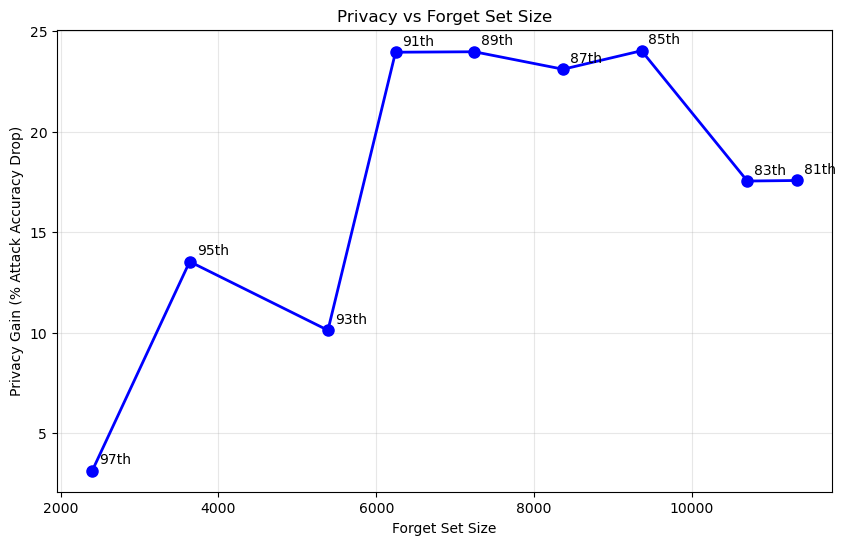

In [28]:
def analyze_forget_set_effects():
    percentiles = [ .81,.83,0.85, 0.87, 0.89, 0.91, 0.93, 0.95, 0.97]
    results = []
        
    for p in percentiles:
        config = {
                'forget_percentile': p,
                'random_seed': 42,  # Keep consistent for comparison
                'num_shadow_models': 10,
                'training_size': 900
            }
            
        result = run_pipeline(config)
            
        results.append({
                'percentile': f"{p*100:.0f}th",
                'forget_size': len(result['forget_set']),
                'privacy_gain': (result['target_accuracy'] - result['unlearn_accuracy']) * 100,
                'target_acc': result['target_accuracy'] * 100,
                'unlearn_acc': result['unlearn_accuracy'] * 100
        })
        
    return results

# Run the analysis
results = analyze_forget_set_effects()

# Extract data for plotting
forget_sizes = [r['forget_size'] for r in results]
privacy_gains = [r['privacy_gain'] for r in results]
percentiles = [r['percentile'] for r in results]

# Create your plot
plt.figure(figsize=(10, 6))
plt.plot(forget_sizes, privacy_gains, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Forget Set Size')
plt.ylabel('Privacy Gain (% Attack Accuracy Drop)')
plt.title('Privacy vs Forget Set Size')
plt.grid(True, alpha=0.3)

for i, (x, y, label) in enumerate(zip(forget_sizes, privacy_gains, percentiles)):
    plt.annotate(label, (x, y), xytext=(5, 5), textcoords='offset points')

plt.show()

Class 0 attack accuracy: 0.508
Class 1 attack accuracy: 0.502


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.509
Class 1 attack accuracy: 0.499


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.502
Class 1 attack accuracy: 0.503


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.507
Class 1 attack accuracy: 0.506


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.503
Class 1 attack accuracy: 0.490


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.505
Class 1 attack accuracy: 0.540


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.497
Class 1 attack accuracy: 0.515


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.508
Class 1 attack accuracy: 0.547


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.506
Class 1 attack accuracy: 0.542


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.499
Class 1 attack accuracy: 0.515


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.495
Class 1 attack accuracy: 0.527


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.501
Class 1 attack accuracy: 0.529


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.500
Class 1 attack accuracy: 0.530


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.511
Class 1 attack accuracy: 0.514


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.497
Class 1 attack accuracy: 0.536


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.499
Class 1 attack accuracy: 0.543


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.504
Class 1 attack accuracy: 0.550


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.511
Class 1 attack accuracy: 0.552


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.510
Class 1 attack accuracy: 0.557


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.504
Class 1 attack accuracy: 0.535


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.510
Class 1 attack accuracy: 0.515


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.499
Class 1 attack accuracy: 0.547


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Class 0 attack accuracy: 0.508
Class 1 attack accuracy: 0.545


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


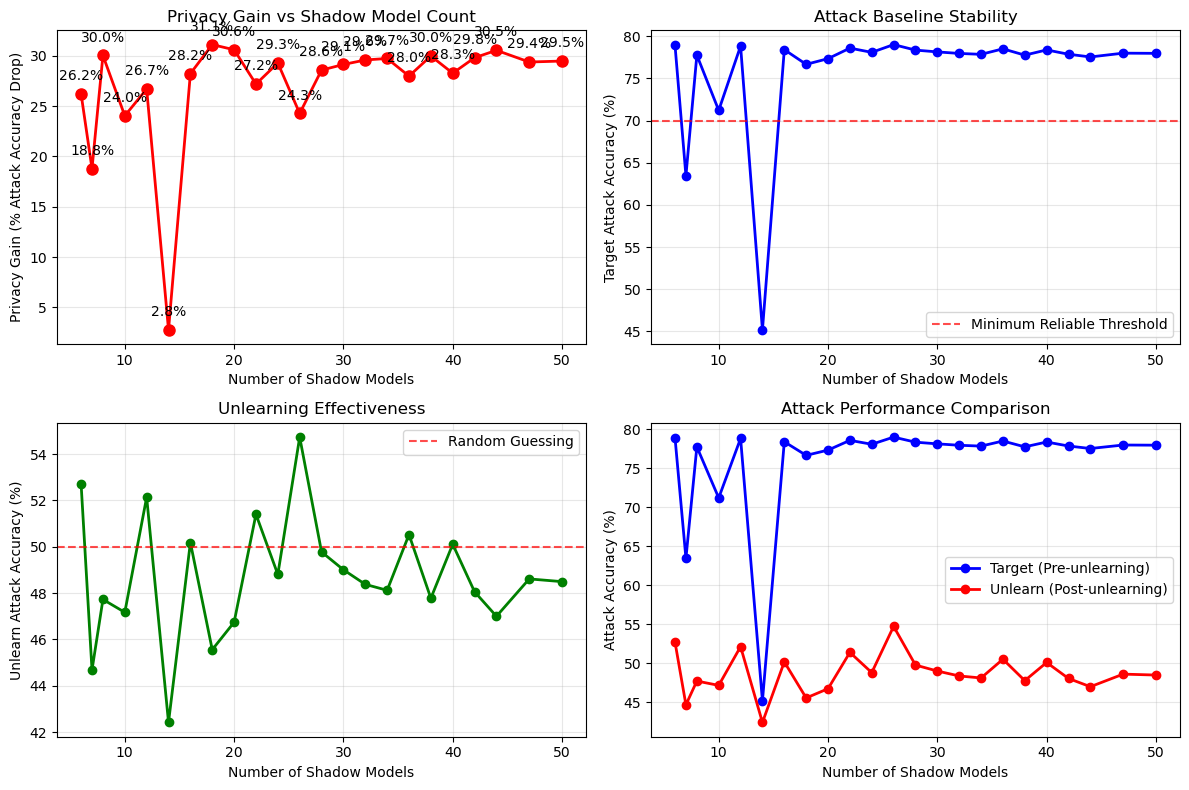


Shadow Model Count Analysis:
 6 models:  26.2% privacy gain, Target:  78.9%, Unlearn:  52.7%
 7 models:  18.8% privacy gain, Target:  63.5%, Unlearn:  44.7%
 8 models:  30.0% privacy gain, Target:  77.8%, Unlearn:  47.7%
10 models:  24.0% privacy gain, Target:  71.2%, Unlearn:  47.2%
12 models:  26.7% privacy gain, Target:  78.8%, Unlearn:  52.1%
14 models:   2.8% privacy gain, Target:  45.2%, Unlearn:  42.4%
16 models:  28.2% privacy gain, Target:  78.4%, Unlearn:  50.2%
18 models:  31.1% privacy gain, Target:  76.7%, Unlearn:  45.6%
20 models:  30.6% privacy gain, Target:  77.3%, Unlearn:  46.7%
22 models:  27.2% privacy gain, Target:  78.6%, Unlearn:  51.4%
24 models:  29.3% privacy gain, Target:  78.1%, Unlearn:  48.8%
26 models:  24.3% privacy gain, Target:  79.0%, Unlearn:  54.7%
28 models:  28.6% privacy gain, Target:  78.3%, Unlearn:  49.8%
30 models:  29.1% privacy gain, Target:  78.1%, Unlearn:  49.0%
32 models:  29.6% privacy gain, Target:  78.0%, Unlearn:  48.4%
34 models:

In [29]:
def analyze_shadow_model_effects():
    # Test different numbers of shadow models
    shadow_counts = [6, 7, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 47, 50]
    results = []
    
    for n_shadows in shadow_counts:
        config = {
            'forget_percentile': 0.85,  # Use optimal percentile from previous analysis
            'random_seed': 42,
            'num_shadow_models': n_shadows,
            'training_size': 900
        }
        
        result = run_pipeline(config)
      
        
        results.append({
            'n_shadow_models': n_shadows,
            'forget_size': len(result['forget_set']),
            'privacy_gain': (result['target_accuracy'] - result['unlearn_accuracy']) * 100,
            'target_acc': result['target_accuracy'] * 100,
            'unlearn_acc': result['unlearn_accuracy'] * 100,
            'non_member_detection': (1 - result['unlearn_accuracy']) * 100,
         
        })
    
    return results

# Run the analysis
shadow_results = analyze_shadow_model_effects()

# Extract data for plotting
shadow_counts = [r['n_shadow_models'] for r in shadow_results]
privacy_gains = [r['privacy_gain'] for r in shadow_results]
target_accs = [r['target_acc'] for r in shadow_results]
unlearn_accs = [r['unlearn_acc'] for r in shadow_results]

# Create the plot
plt.figure(figsize=(12, 8))

# Main plot: Privacy Gain vs Shadow Model Count
plt.subplot(2, 2, 1)
plt.plot(shadow_counts, privacy_gains, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Shadow Models')
plt.ylabel('Privacy Gain (% Attack Accuracy Drop)')
plt.title('Privacy Gain vs Shadow Model Count')
plt.grid(True, alpha=0.3)

# Annotate points
for x, y in zip(shadow_counts, privacy_gains):
    plt.annotate(f'{y:.1f}%', (x, y), xytext=(0, 10), textcoords='offset points', ha='center')

# Subplot 2: Target Attack Accuracy
plt.subplot(2, 2, 2)
plt.plot(shadow_counts, target_accs, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Number of Shadow Models')
plt.ylabel('Target Attack Accuracy (%)')
plt.title('Attack Baseline Stability')
plt.grid(True, alpha=0.3)
plt.axhline(y=70, color='r', linestyle='--', alpha=0.7, label='Minimum Reliable Threshold')
plt.legend()

# Subplot 3: Unlearn Attack Accuracy
plt.subplot(2, 2, 3)
plt.plot(shadow_counts, unlearn_accs, 'go-', linewidth=2, markersize=6)
plt.xlabel('Number of Shadow Models')
plt.ylabel('Unlearn Attack Accuracy (%)')
plt.title('Unlearning Effectiveness')
plt.grid(True, alpha=0.3)
plt.axhline(y=50, color='r', linestyle='--', alpha=0.7, label='Random Guessing')
plt.legend()

# Subplot 4: Both lines together
plt.subplot(2, 2, 4)
plt.plot(shadow_counts, target_accs, 'bo-', linewidth=2, markersize=6, label='Target (Pre-unlearning)')
plt.plot(shadow_counts, unlearn_accs, 'ro-', linewidth=2, markersize=6, label='Unlearn (Post-unlearning)')
plt.xlabel('Number of Shadow Models')
plt.ylabel('Attack Accuracy (%)')
plt.title('Attack Performance Comparison')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Print summary
print("\nShadow Model Count Analysis:")
print("=" * 50)
for r in shadow_results:
    print(f"{r['n_shadow_models']:2d} models: {r['privacy_gain']:5.1f}% privacy gain, "
          f"Target: {r['target_acc']:5.1f}%, Unlearn: {r['unlearn_acc']:5.1f}%")

# Find optimal number
best_idx = max(range(len(shadow_results)), key=lambda i: shadow_results[i]['privacy_gain'])
optimal = shadow_results[best_idx]
print(f"\nOptimal: {optimal['n_shadow_models']} shadow models with {optimal['privacy_gain']:.1f}% privacy gain")
# Check shadow model chunk sizes and performance

Limited evaluation on different data types/models
No standardized benchmarks for "how unlearned is unlearned enough?"
What's the privacy-utility tradeoff curve?

Vary number of shadow models: Test with 1, 5, 10, 15, 20 shadow models
Ablation study: Test individual confidence features vs. all combined
Data size impact: Vary the size of data each shadow model trains on